### This notebook is for understanding the shape and signal of Qbb events in a NEXT-100 geometry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from invisible_cities.reco.xy_algorithms import barycenter

In [18]:
#file_name = "/Users/taylorcontreras/Development/Research/trackingplane/teflonhole_5mm/s3mmp15mm/flex.kr83m.1.nexus.h5"
file_name = "/Users/taylorcontreras/Development/Research/trackingplane/data/highenergy/no_teflon/s3mmp15mm/flex.kr83m.1.nexus.h5"
this_dir = "/Users/taylorcontreras/Development/Research/trackingplane/test_notebooks/"
outdir = this_dir

In [19]:
config = pd.read_hdf(file_name, "MC/configuration")
config

,param_key,param_value
0,event_type,other
1,num_events,10
2,saved_events,10
3,interacting_events,0
4,PmtR11410_binning,0.025000 mus
...,...,...
72,/event/verbose,0
73,/tracking/verbose,0
74,/nexus/random_seed,2
75,/nexus/persistency/start_id,10


In [20]:
sns_response = pd.read_hdf(file_name, 'MC/sns_response')
sns_positions = pd.read_hdf(file_name, 'MC/sns_positions')
particles = pd.read_hdf(file_name, 'MC/particles')
hits = pd.read_hdf(file_name, 'MC/hits')

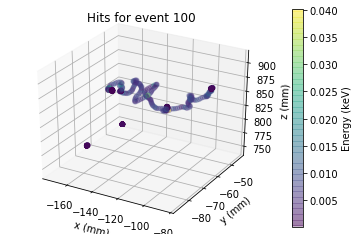

In [21]:
# Plot entire track of one event
event = hits.loc[hits.event_id==10]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(event.x, event.y, event.z, c=event.energy, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
ax.set_title('Hits for event 100')

plt.show()

In [22]:
# Getting sensor info
sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]
sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]

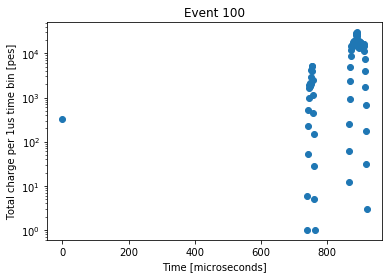

Text(0.5, 1.0, 'Event 100')

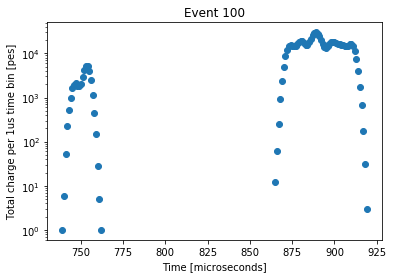

In [23]:
# Example of one event 
sipm_response_event100 = sipm_response.loc[sipm_response.event_id==10]
response_bytime_sipm_event100 = sipm_response_event100.groupby('time_bin')
charge_per_timebin_event100 = response_bytime_sipm_event100.agg({"charge":"sum"})
plt.plot(charge_per_timebin_event100.index, charge_per_timebin_event100.charge, 'o')
plt.yscale('log')
plt.xlabel('Time [microseconds]')
plt.ylabel('Total charge per 1us time bin [pes]')
plt.title('Event 100')
plt.show()

# Excluding S1
charge_per_timebin_event100_noS1 = charge_per_timebin_event100.loc[charge_per_timebin_event100.index>0]
plt.plot(charge_per_timebin_event100_noS1.index.values, charge_per_timebin_event100_noS1.charge.values, 'o')
plt.yscale('log')
plt.xlabel('Time [microseconds]')
plt.ylabel('Total charge per 1us time bin [pes]')
plt.title('Event 100')

In [24]:
# Connect sensor response and positions
sensor_positions = sipm_positions.loc[sipm_positions.sensor_id.isin(sipm_response_event100.sensor_id.tolist())]
sensor_positions_rep = sensor_positions.reindex(sensor_positions.index.repeat(sipm_response_event100.groupby('sensor_id').sensor_id.count().values))
sipms_event100 = sipm_response_event100.merge(sensor_positions_rep)
sipms_event100

,event_id,sensor_id,time_bin,charge,sensor_name,x,y,z
0,10,1000,882,2,TP_SiPM,-7.5,-487.5,-23.301001
1,10,1000,882,2,TP_SiPM,-7.5,-487.5,-23.301001
2,10,1000,882,2,TP_SiPM,-7.5,-487.5,-23.301001
3,10,1000,882,2,TP_SiPM,-7.5,-487.5,-23.301001
4,10,1000,882,2,TP_SiPM,-7.5,-487.5,-23.301001
...,...,...,...,...,...,...,...,...
5266698,10,4307,912,1,TP_SiPM,7.5,487.5,-23.301001
5266699,10,4307,912,1,TP_SiPM,7.5,487.5,-23.301001
5266700,10,4307,912,1,TP_SiPM,7.5,487.5,-23.301001
5266701,10,4307,912,1,TP_SiPM,7.5,487.5,-23.301001


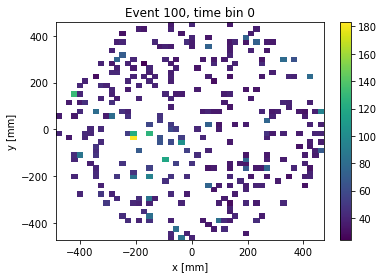

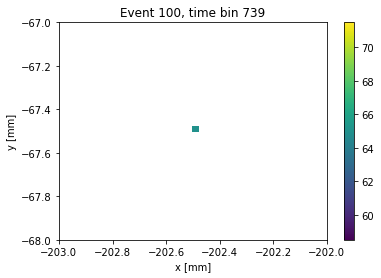

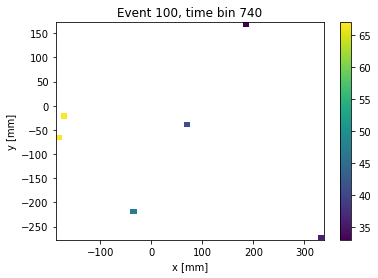

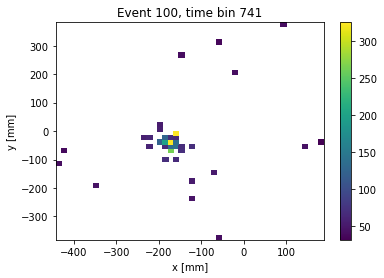

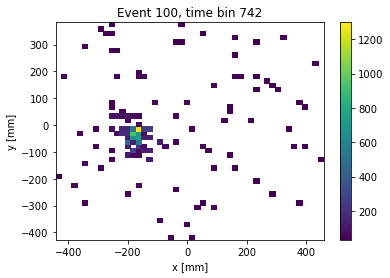

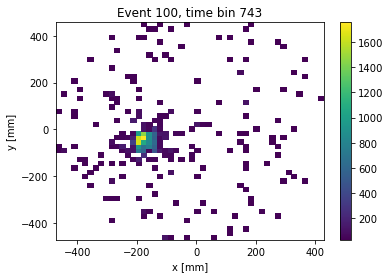

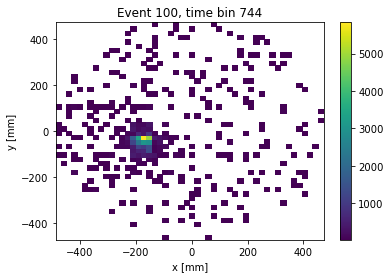

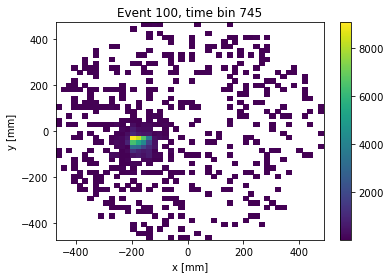

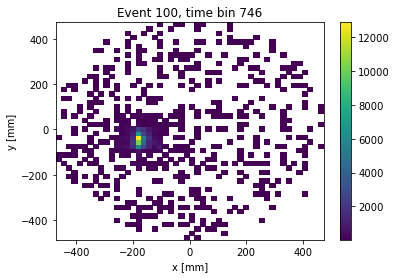

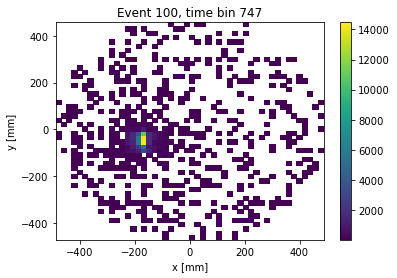

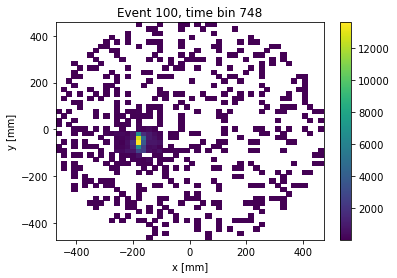

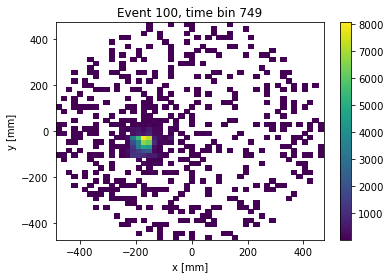

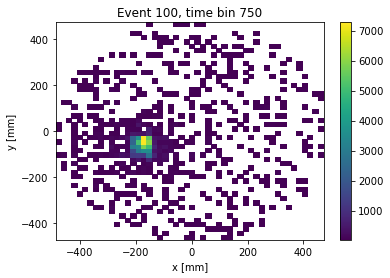

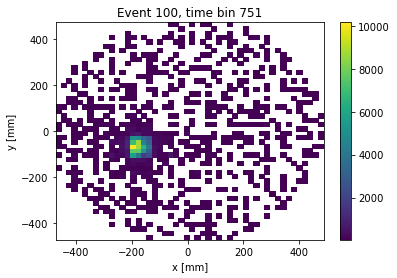

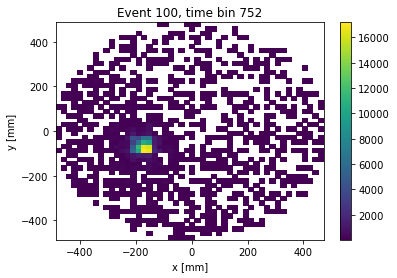

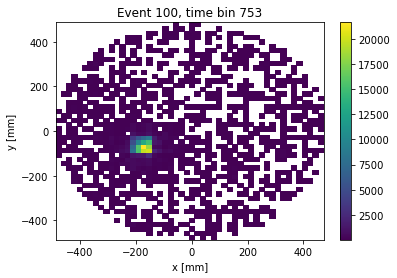

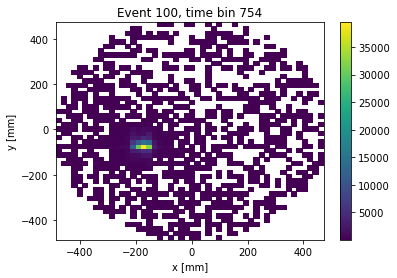

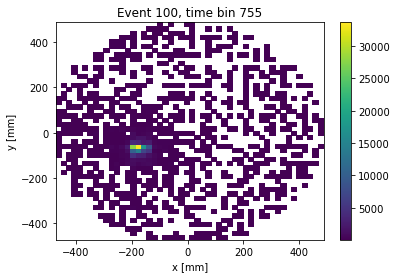

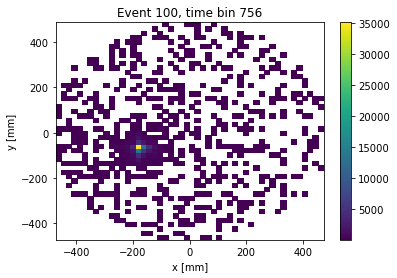

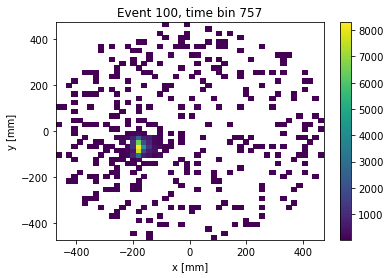

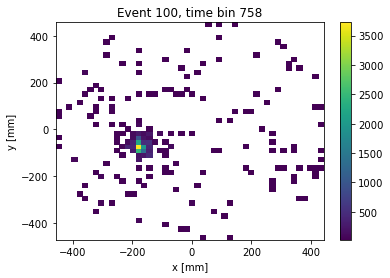

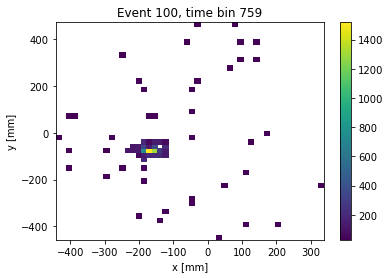

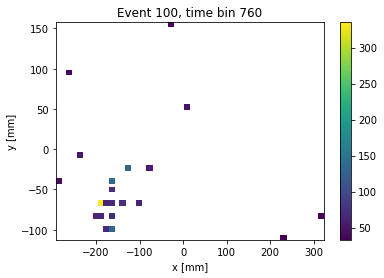

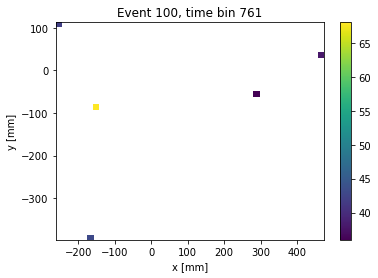

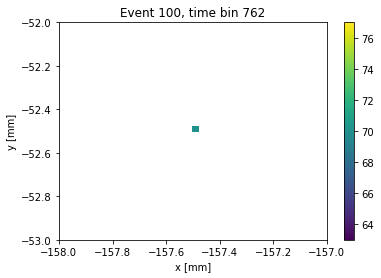

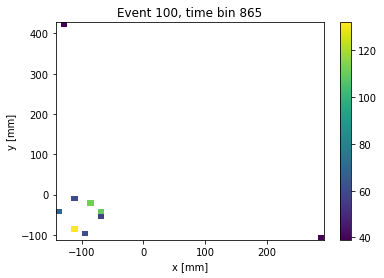

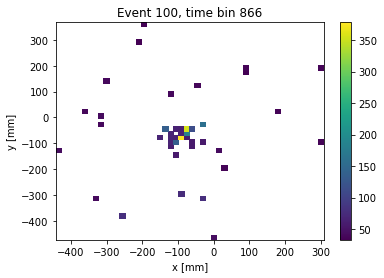

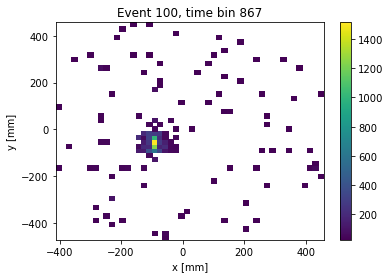

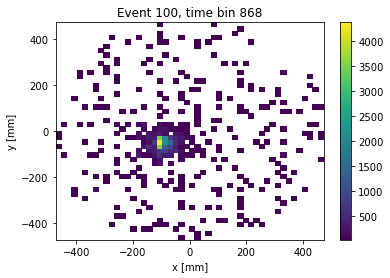

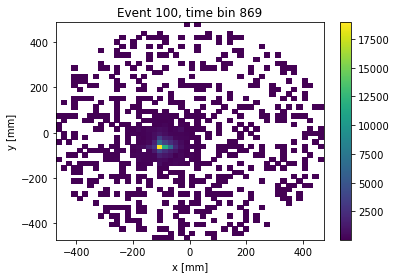

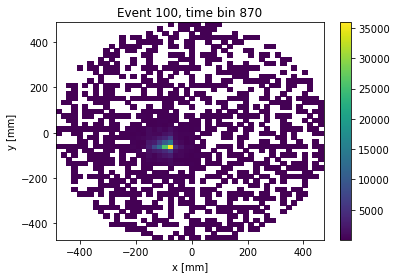

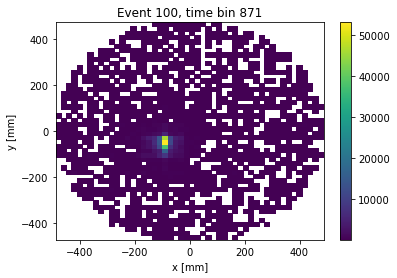

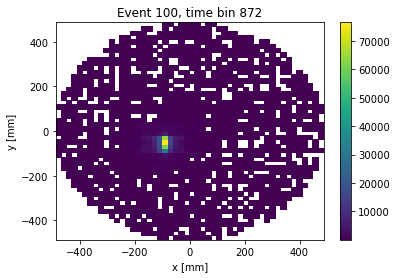

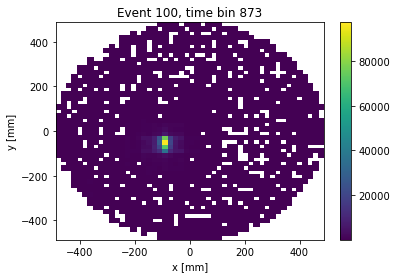

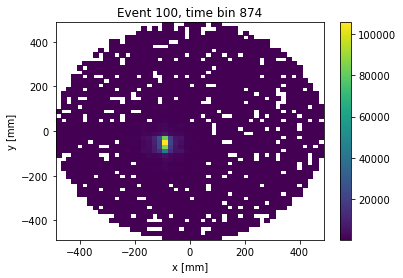

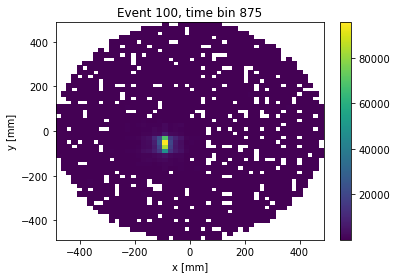

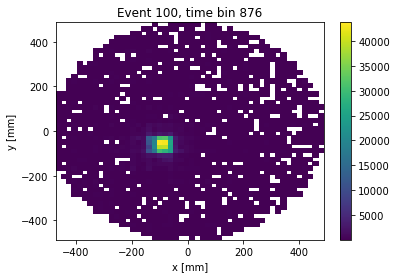

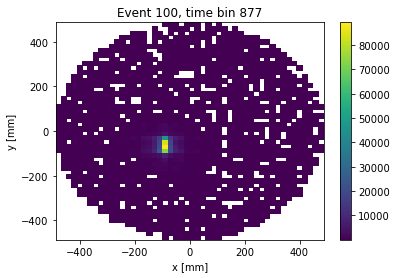

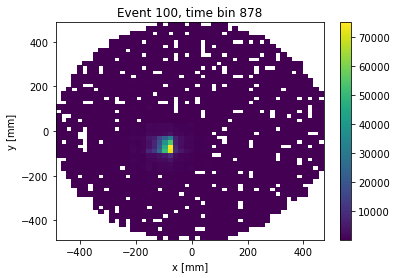

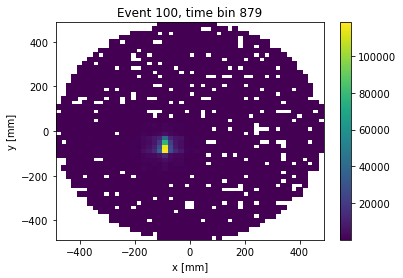

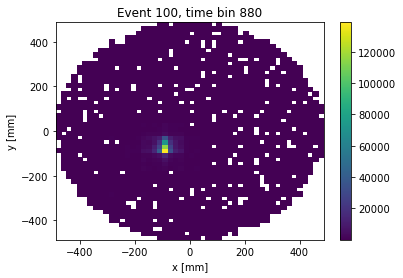

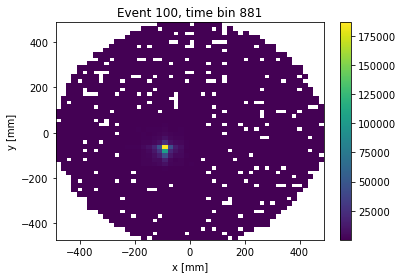

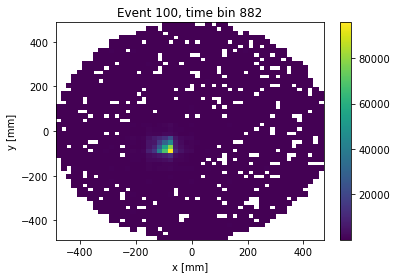

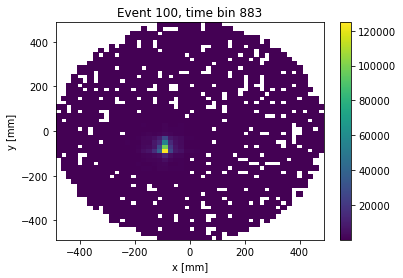

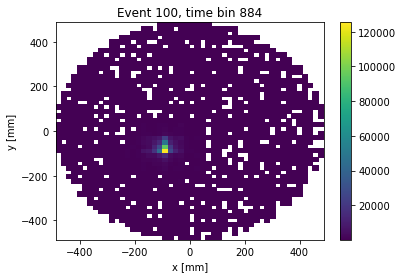

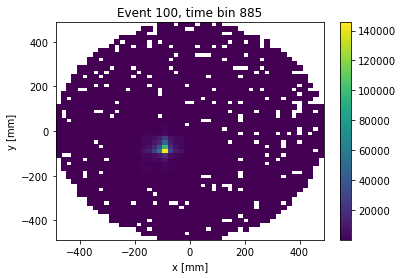

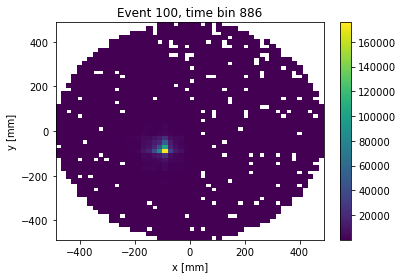

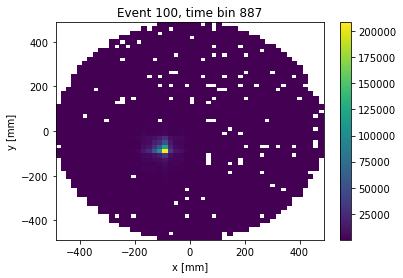

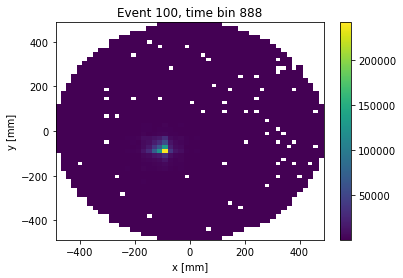

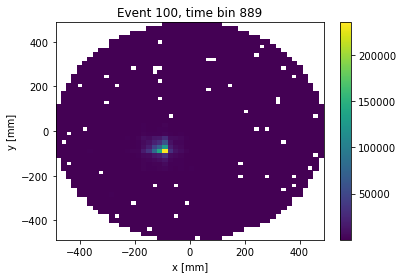

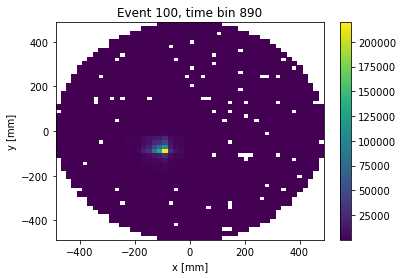

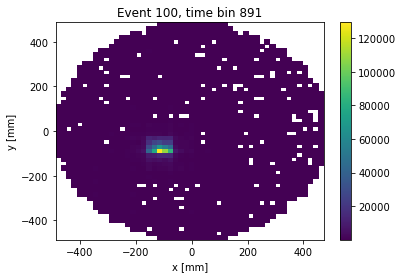

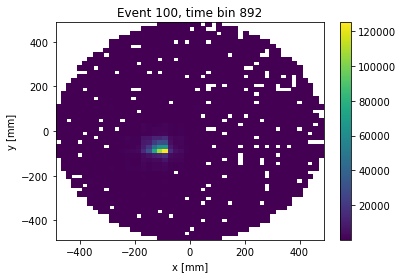

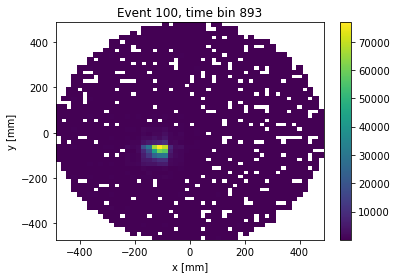

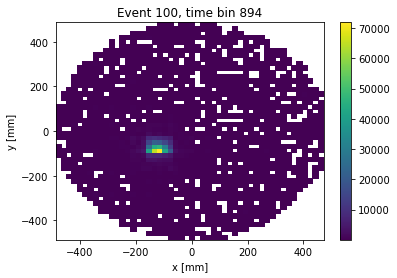

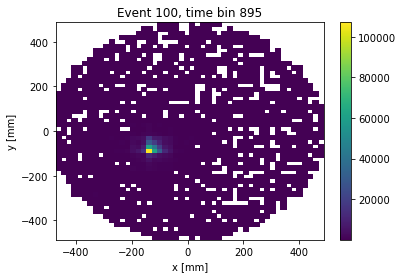

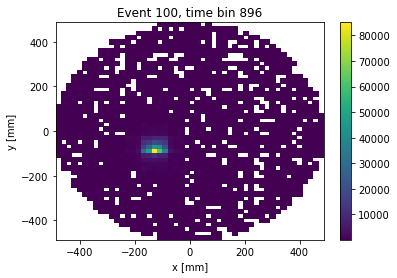

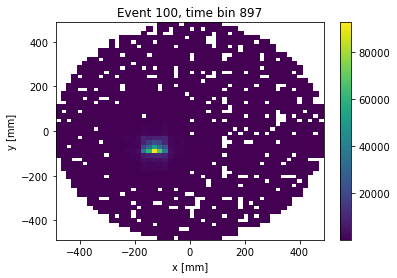

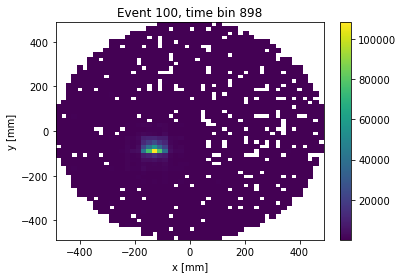

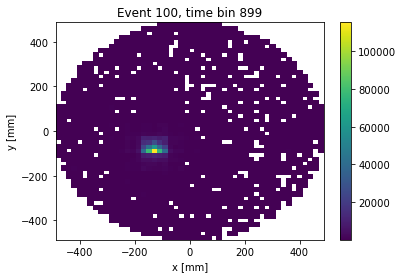

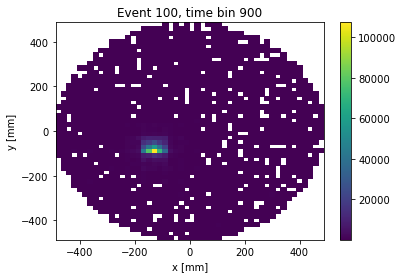

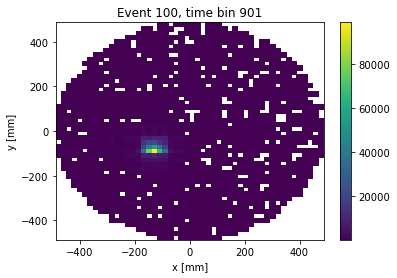

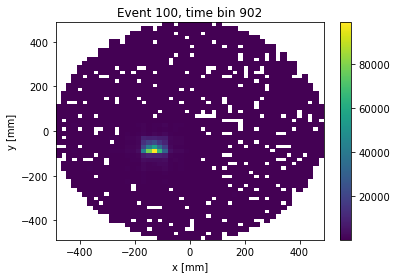

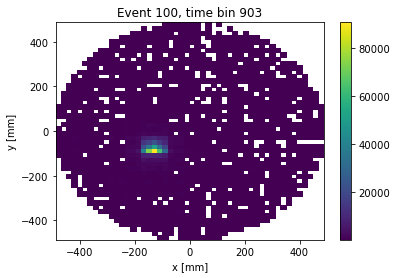

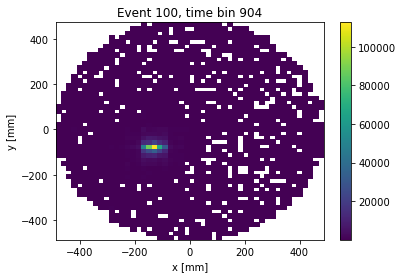

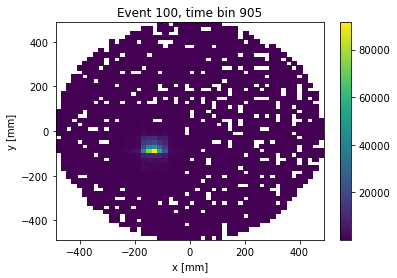

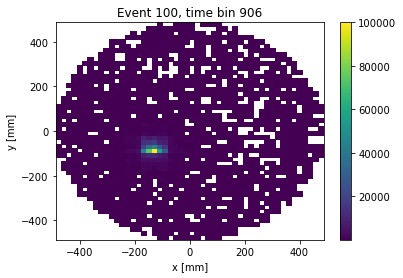

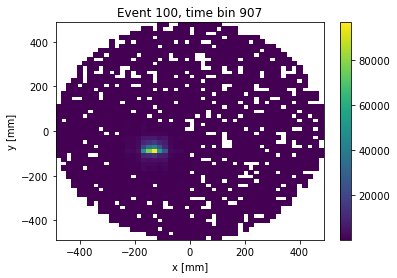

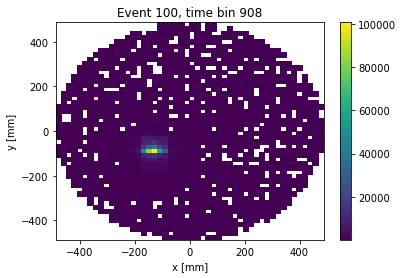

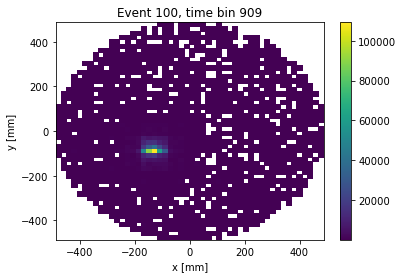

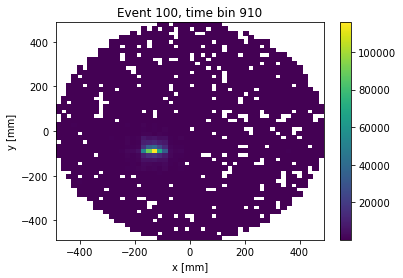

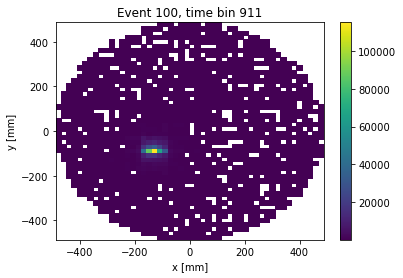

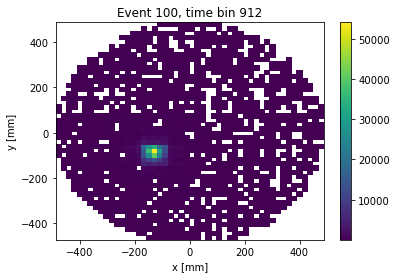

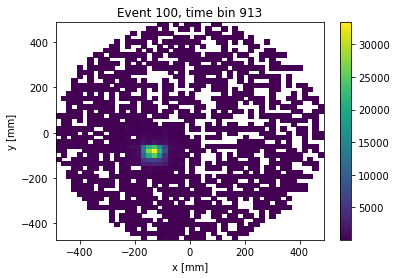

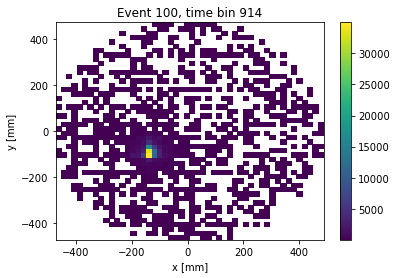

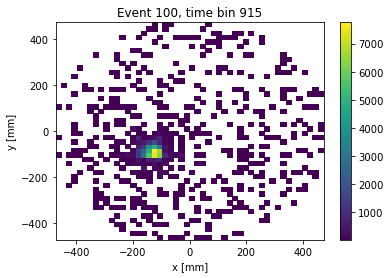

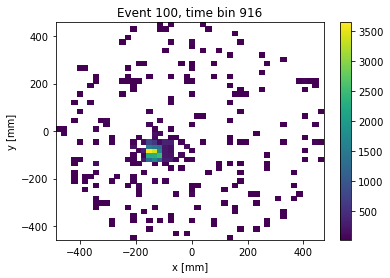

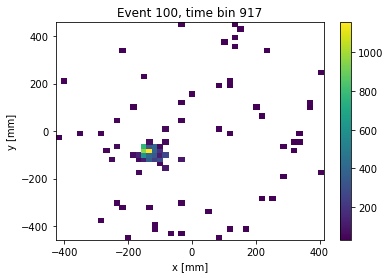

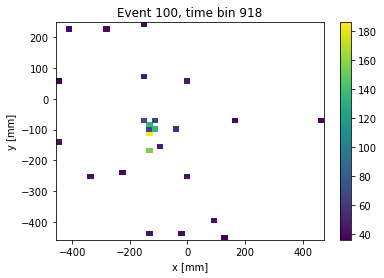

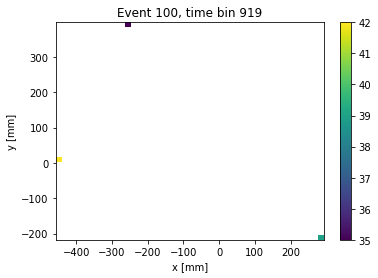

In [25]:
for _, time_bin in sipms_event100.groupby('time_bin'):
    plt.hist2d(time_bin.x, time_bin.y, weights = time_bin.charge, bins = [50,50], cmin=1)
    plt.title('Event 100, time bin '+str(time_bin.time_bin.values[0]))
    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')
    plt.colorbar()
    plt.show()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24., 55.]),
 array([  0. ,  91.9, 183.8, 275.7, 367.6, 459.5, 551.4, 643.3, 735.2,
        827.1, 919. ]),
 <a list of 10 Patch objects>)

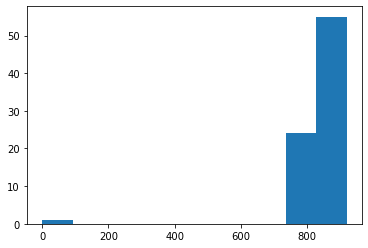

In [26]:
time_bins = sipms_event100.time_bin.drop_duplicates().sort_values()
plt.hist(time_bins)

In [27]:
def split_in_peaks(indices, stride):
    where = np.where(np.diff(indices) > stride)[0]
    return np.split(indices, where + 1)

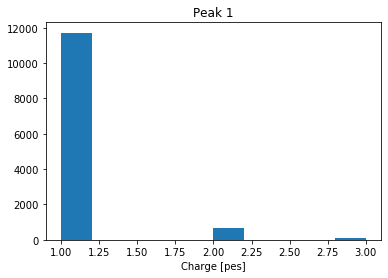

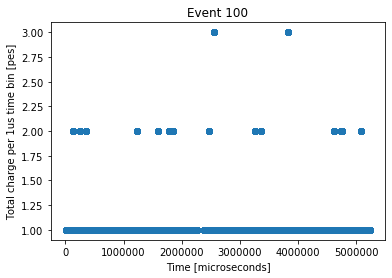

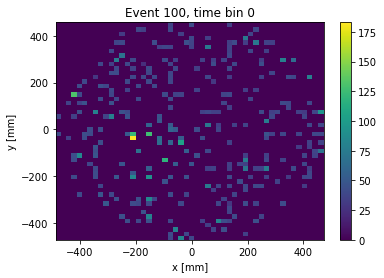

13353


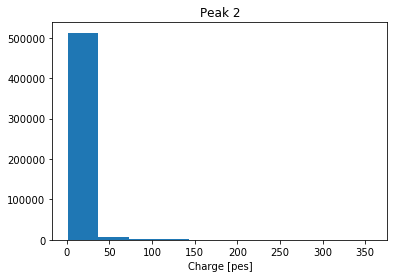

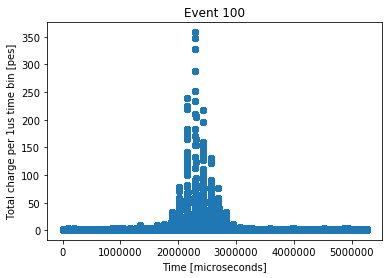

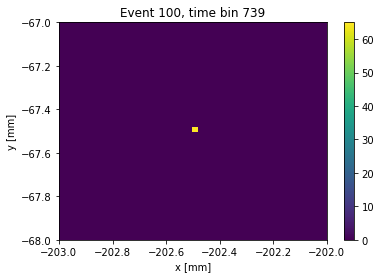

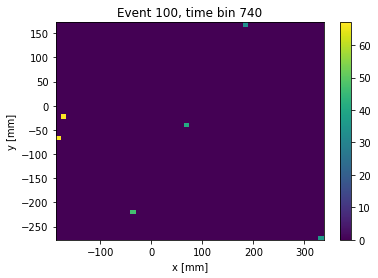

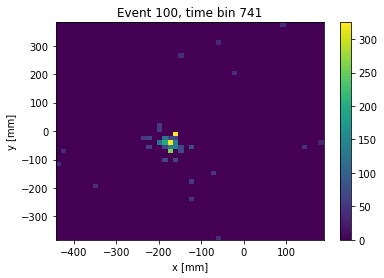

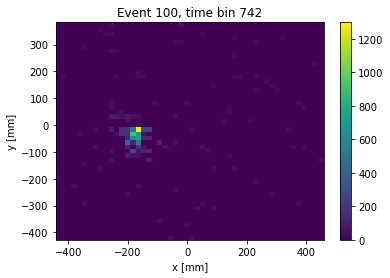

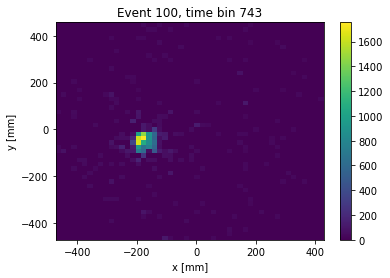

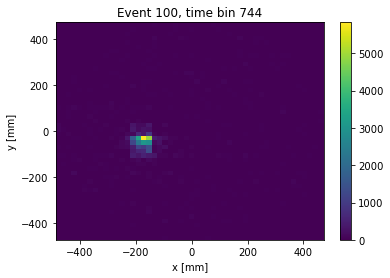

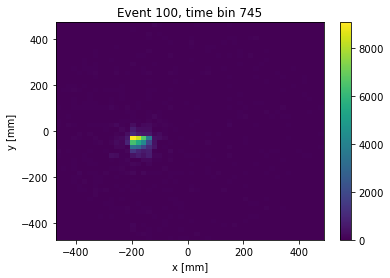

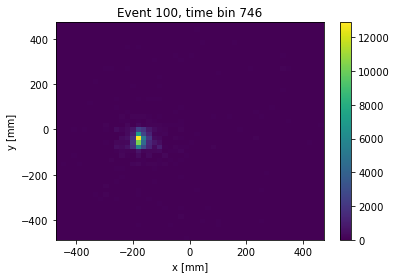

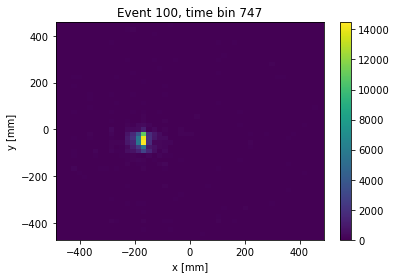

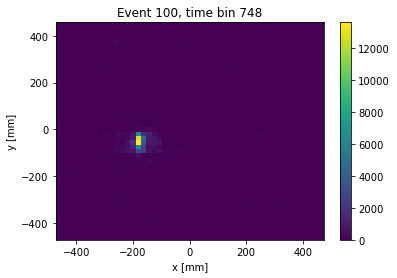

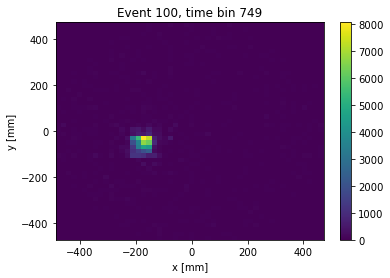

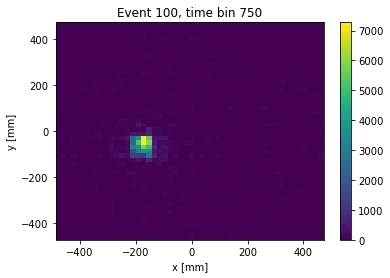

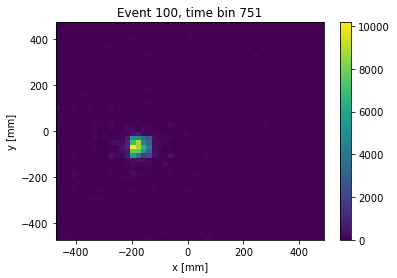

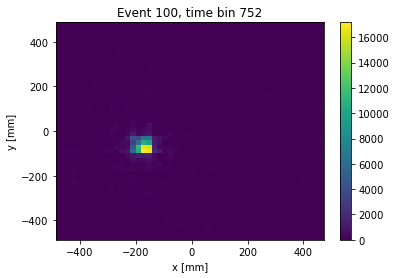

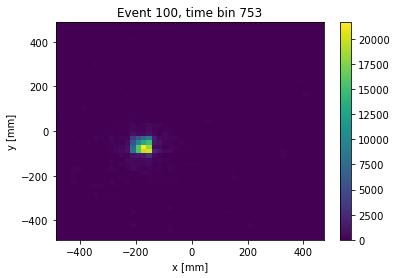

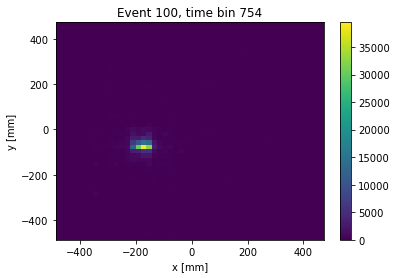

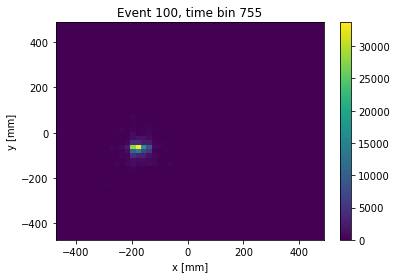

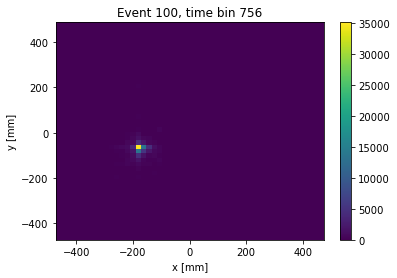

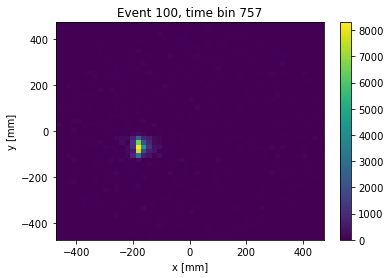

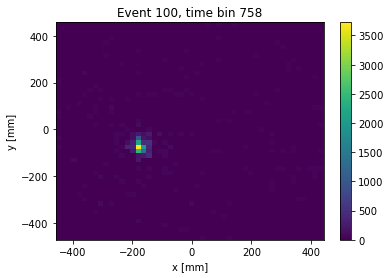

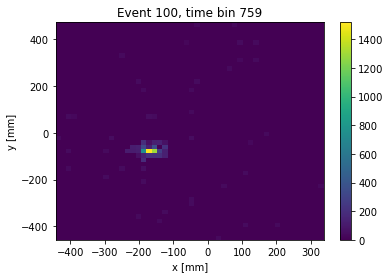

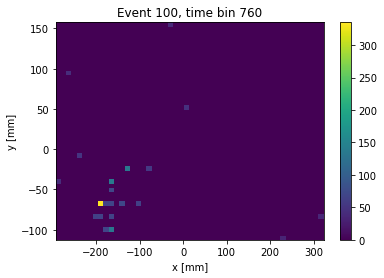

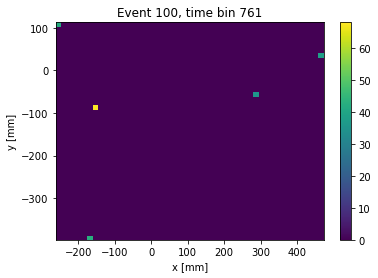

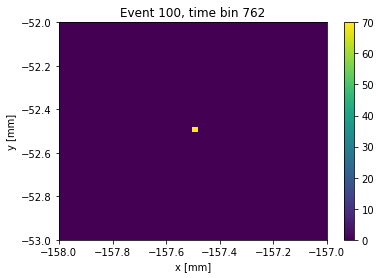

2228789


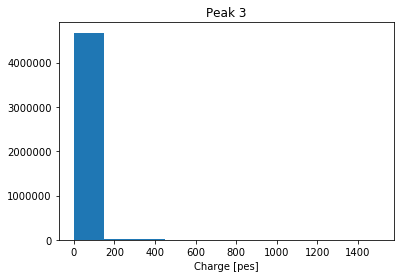

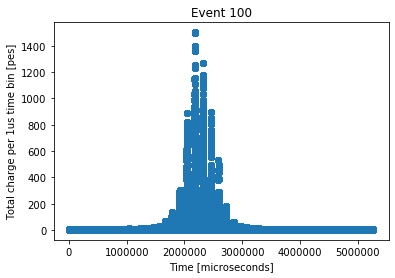

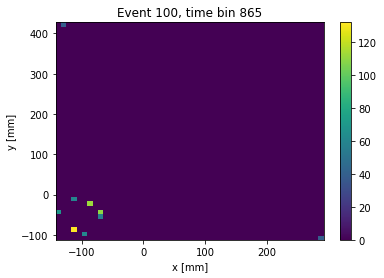

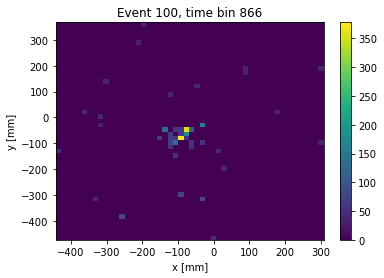

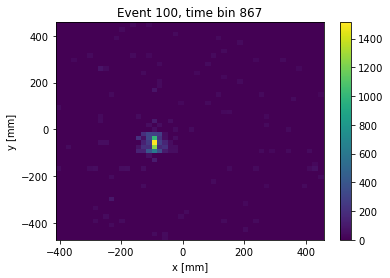

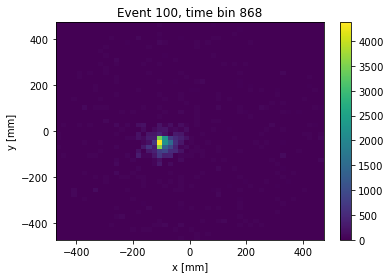

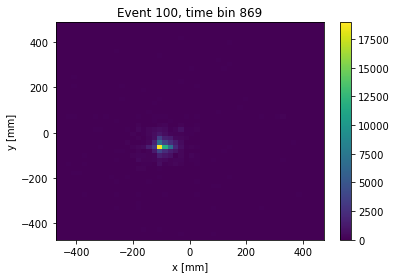

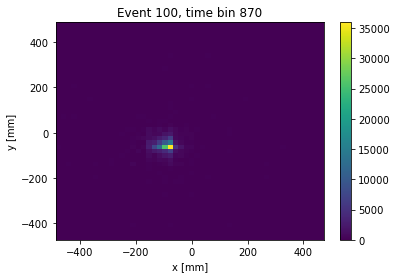

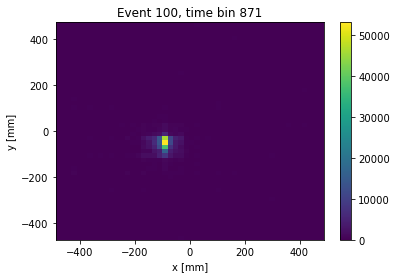

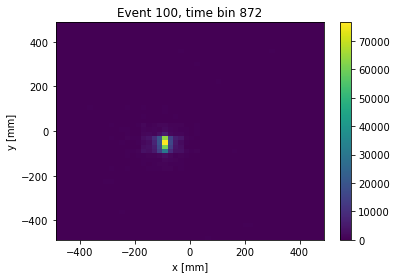

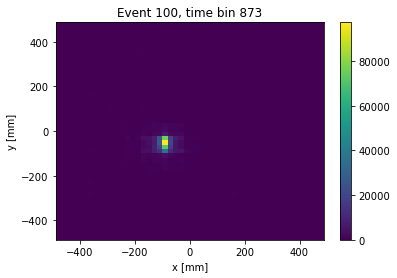

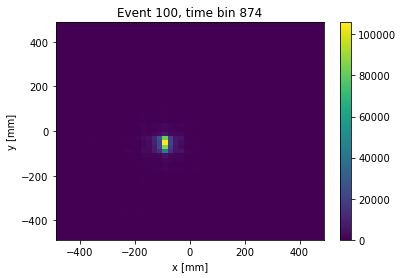

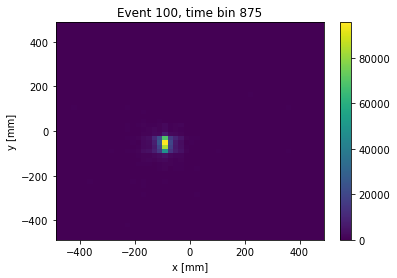

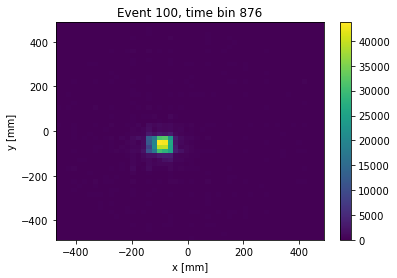

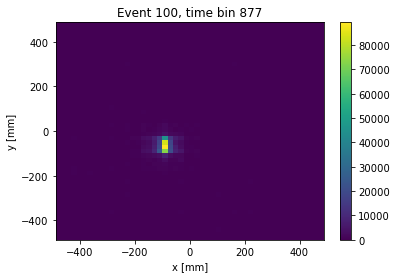

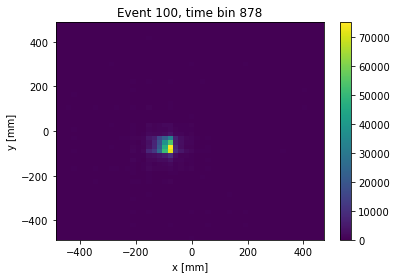

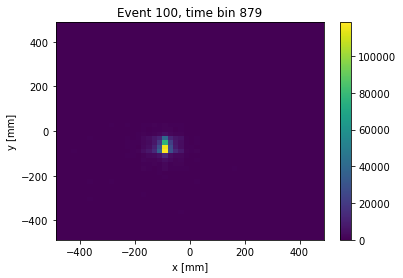

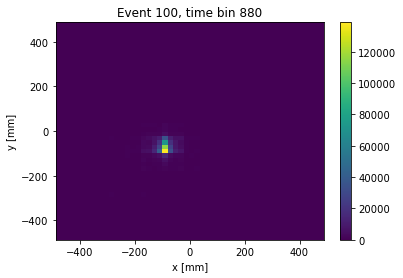

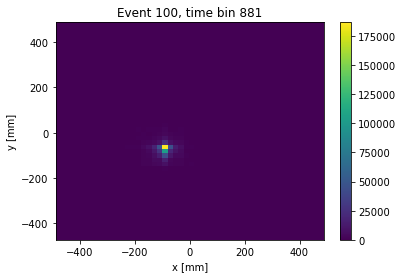

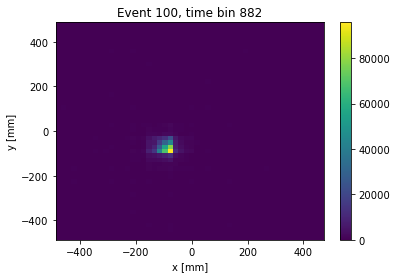

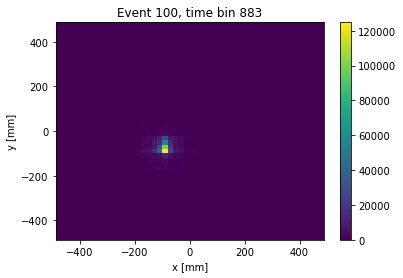

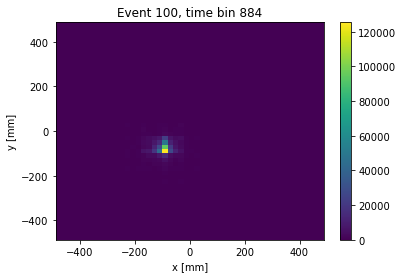

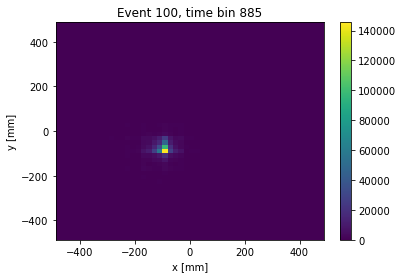

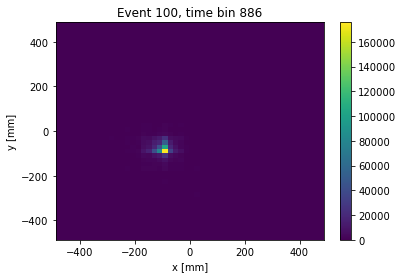

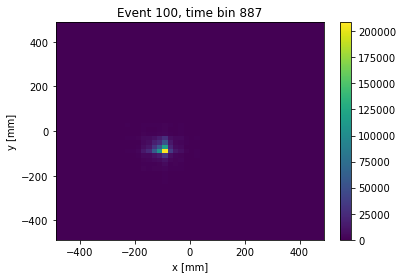

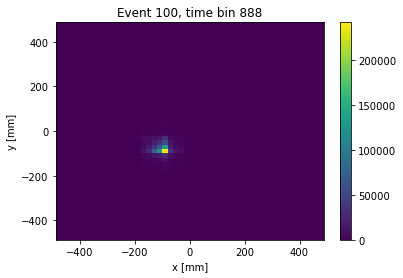

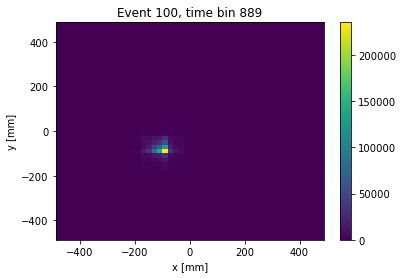

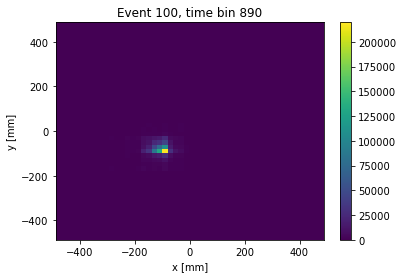

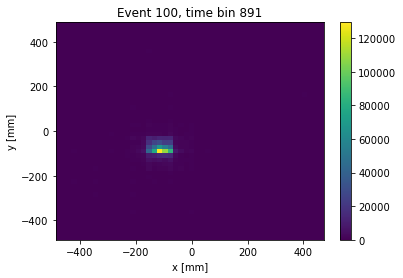

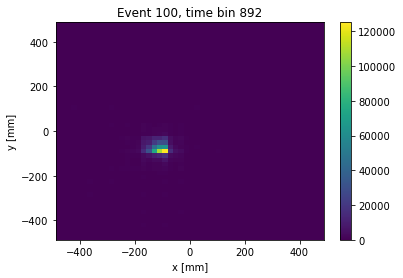

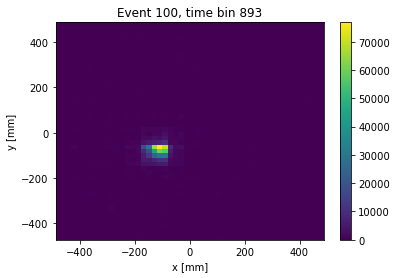

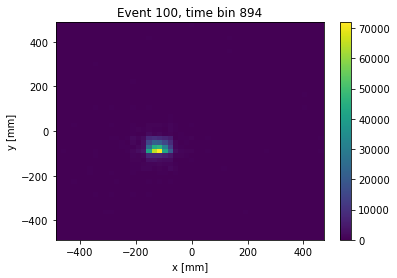

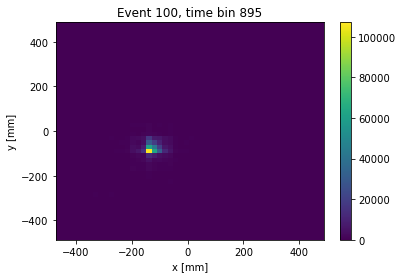

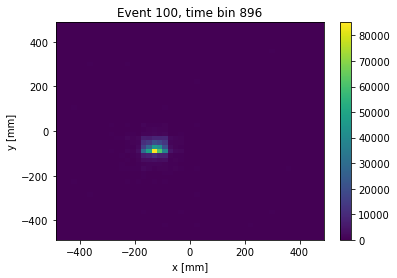

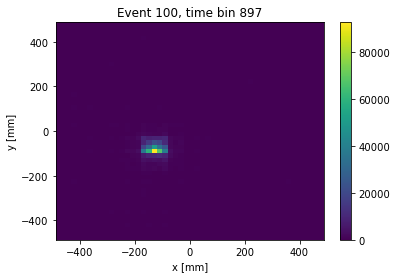

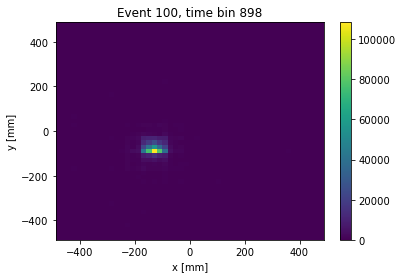

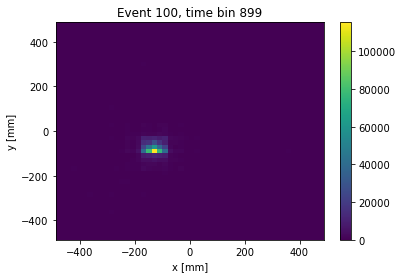

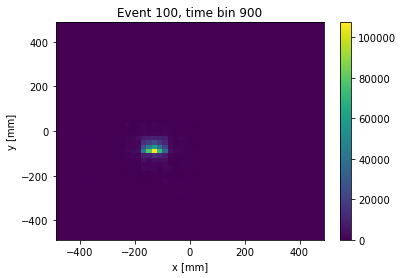

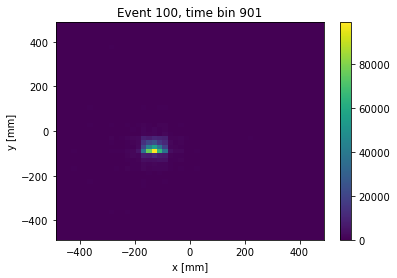

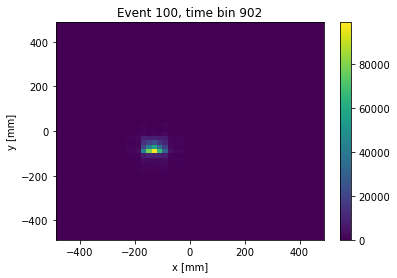

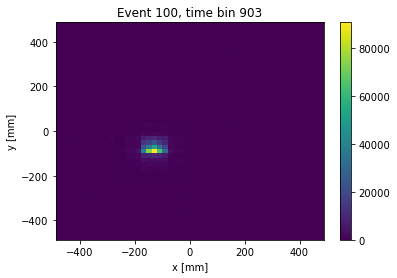

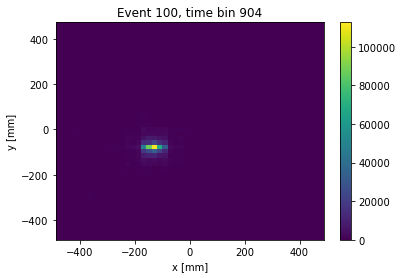

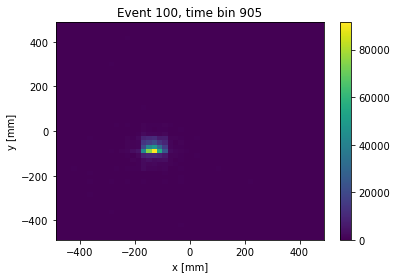

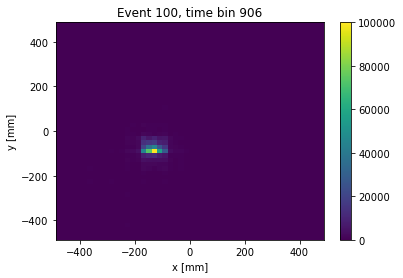

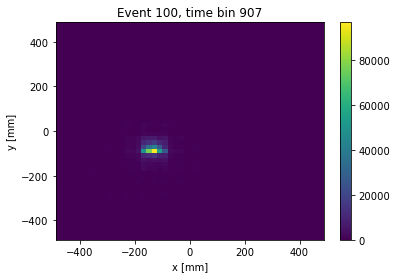

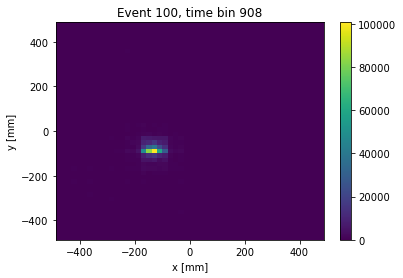

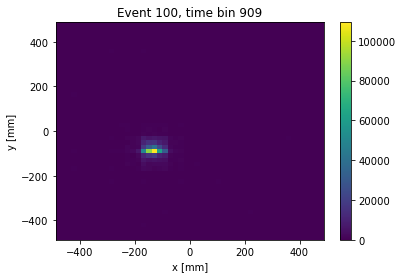

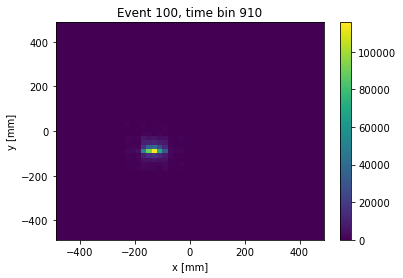

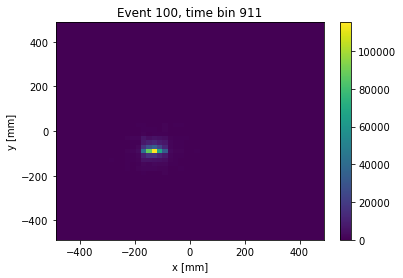

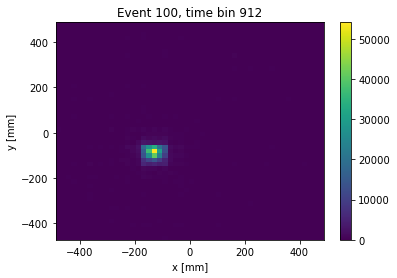

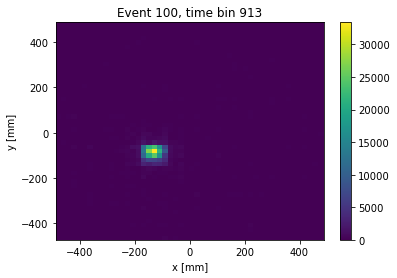

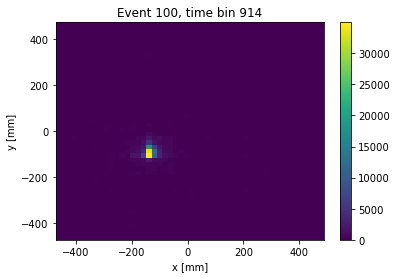

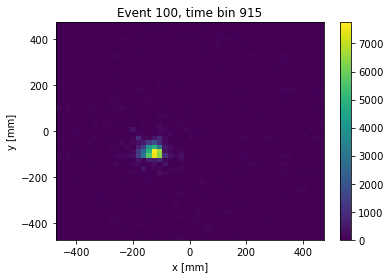

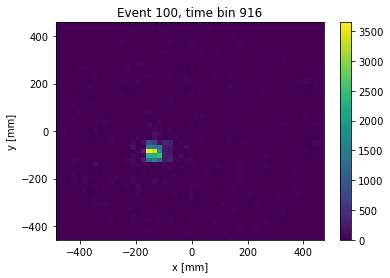

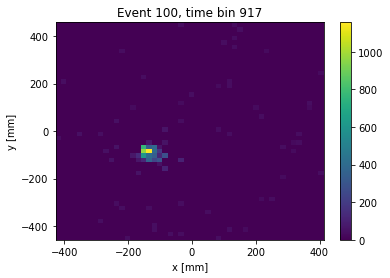

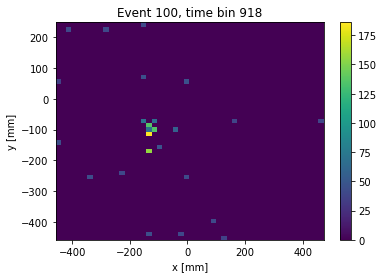

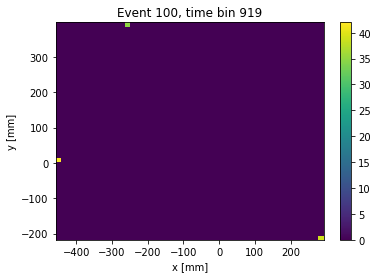

41656366


In [28]:
peaks = split_in_peaks(time_bins, 1)
i = 1
for peak_timebins in peaks:
    thispeak_charges = sipms_event100.loc[sipms_event100.time_bin.isin(peak_timebins)]
    plt.hist(thispeak_charges.charge)
    plt.title('Peak '+str(i))
    plt.xlabel('Charge [pes]')
    plt.show()
    
    plt.plot(thispeak_charges.index.values, thispeak_charges.charge.values, 'o')
    #plt.yscale('log')
    plt.xlabel('Time [microseconds]')
    plt.ylabel('Total charge per 1us time bin [pes]')
    plt.title('Event 100')
    plt.show()
    
    for _, time_bin in thispeak_charges.groupby('time_bin'):
        plt.hist2d(time_bin.x, time_bin.y, weights = time_bin.charge, bins = [50,50])
        plt.title('Event 100, time bin '+str(time_bin.time_bin.values[0]))
        plt.xlabel('x [mm]')
        plt.ylabel('y [mm]')
        plt.colorbar()
        plt.show()
        
    print(thispeak_charges.charge.sum())
    
    i += 1

(array([2., 3., 0., 0., 1., 0., 0., 2., 0., 2.]),
 array([1197. , 1486.8, 1776.6, 2066.4, 2356.2, 2646. , 2935.8, 3225.6,
        3515.4, 3805.2, 4095. ]),
 <a list of 10 Patch objects>)

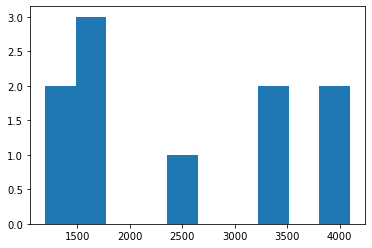

In [29]:
plt.hist(sipm_response.groupby('event_id').apply(lambda grp: max(grp.charge)))

In [30]:
# Getting top time bins by signal in one event
time_binning = 1.0 # sipm time binning in us
v = 1.0 # drift velocity in mm/us
r = 20.0 # radius of blob
blob_time_width = r*2./v # width of blob signal
blob_time_bins = int(blob_time_width/time_binning)
num_bins = 10 # would like to take blob_time_bins but it seems to be too large, not sure why
top_bins = charge_per_timebin_event100.nlargest(num_bins, 'charge').index
top_bins

UInt64Index([889, 888, 890, 887, 891, 886, 892, 880, 881, 899], dtype='uint64', name='time_bin')

In [31]:
sipms_topbins = sipms_event100.loc[sipms_event100.time_bin.isin(top_bins)]

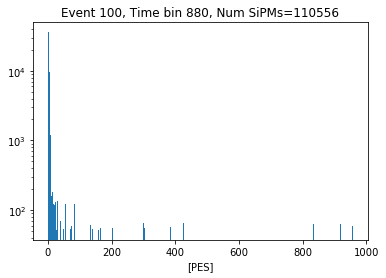

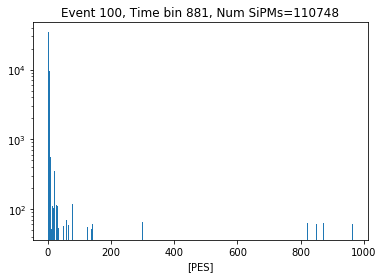

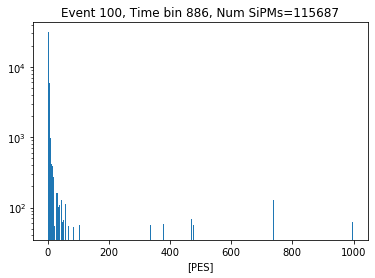

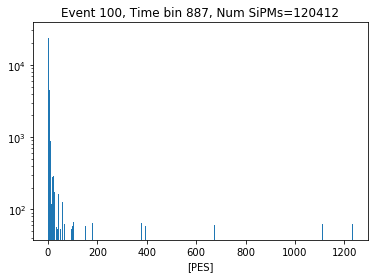

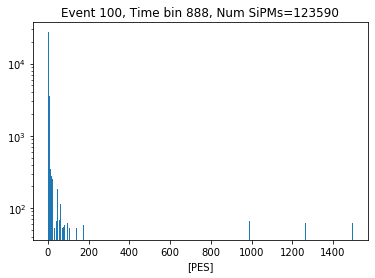

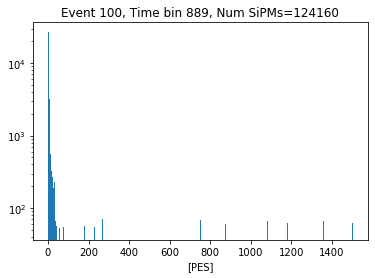

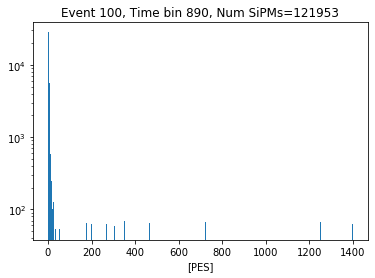

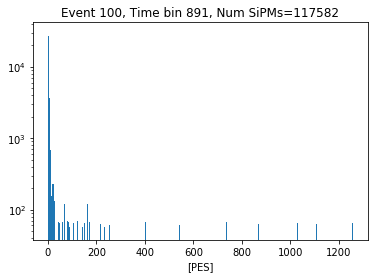

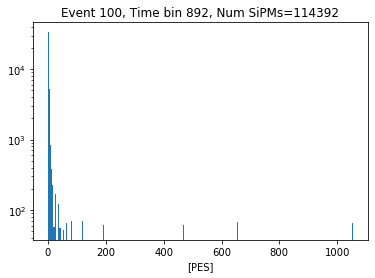

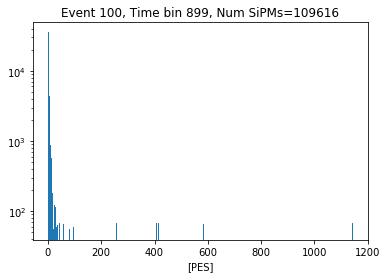

In [32]:
sipms_topbins
topsipms_by_time = sipms_topbins.groupby('time_bin')
for _, timebin in topsipms_by_time:
    plt.hist(timebin.charge, bins=max(timebin.charge))
    plt.yscale('log')
    plt.title('Event 100'+', Time bin '+str(timebin.time_bin.values[0])+', Num SiPMs='+str(len(timebin)))
    plt.xlabel('[PES]')
    plt.show()
#charge_per_timebin_event100 = response_bytime_sipm_event100.agg({"charge":"sum"})

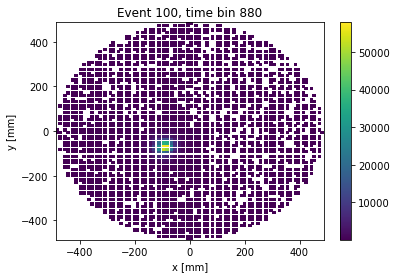

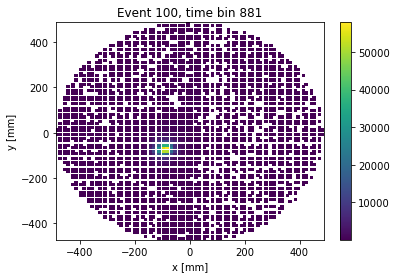

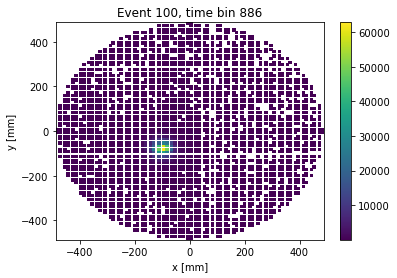

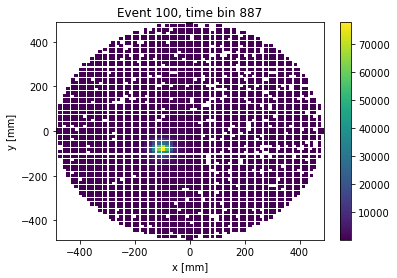

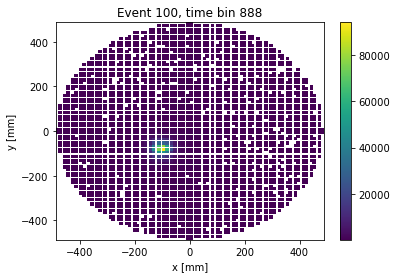

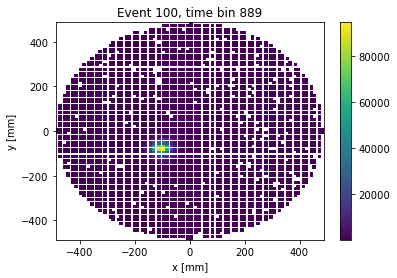

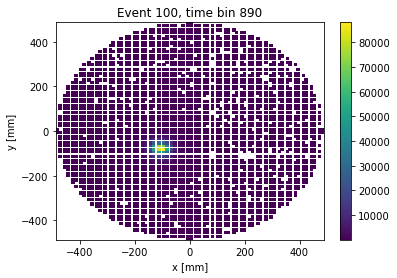

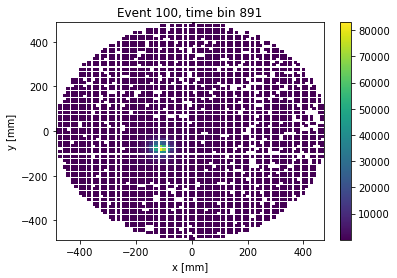

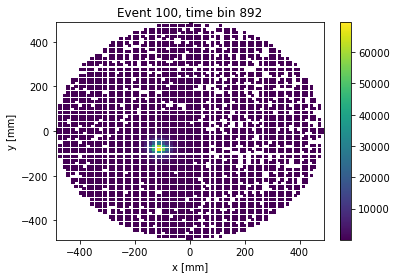

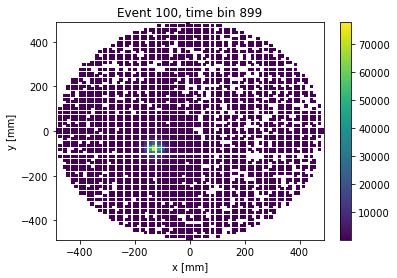

In [33]:
sipm_size = 1.3 # mm

for _, time_bin in sipms_topbins.groupby('time_bin'):
    plt.hist2d(time_bin.x, time_bin.y, weights = time_bin.charge, bins = [100,100], cmin=1)
    plt.title('Event 100, time bin '+str(time_bin.time_bin.values[0]))
    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')
    plt.colorbar()
    plt.show()

-------------------- Event 10 -----------------------


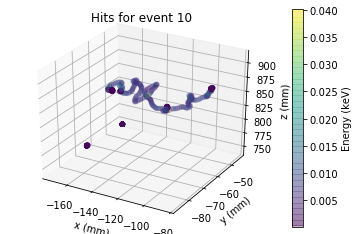

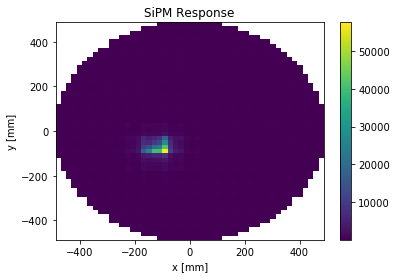

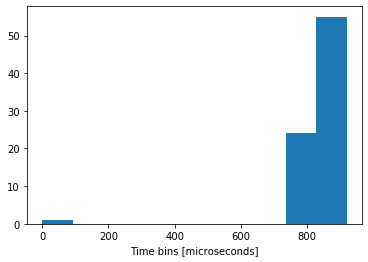

3


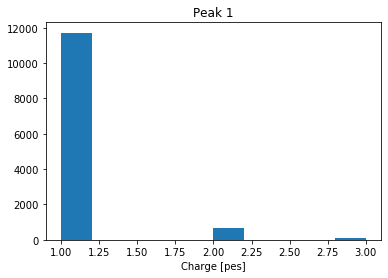

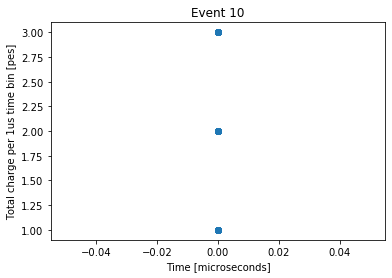

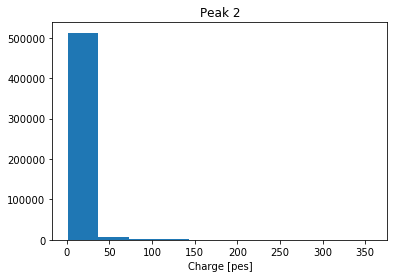

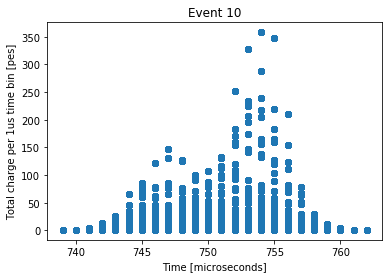

    Total charge in peak 2 = 2228789
    Max charge per time bin = 358
    Width of event = 23 us


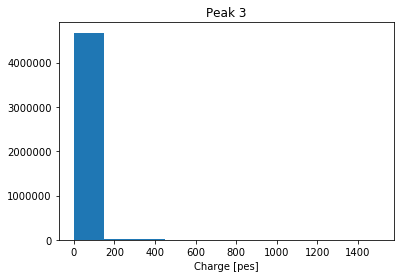

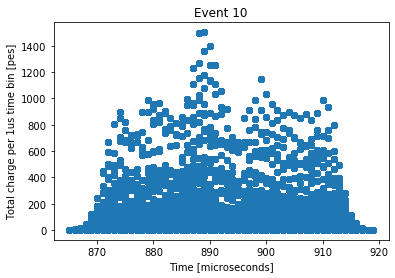

    Total charge in peak 3 = 41656366
    Max charge per time bin = 1502
    Width of event = 54 us
-------------------- Event 11 -----------------------


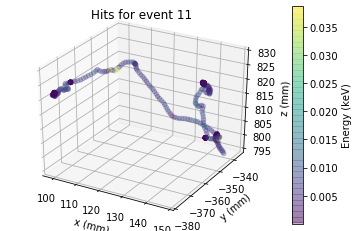

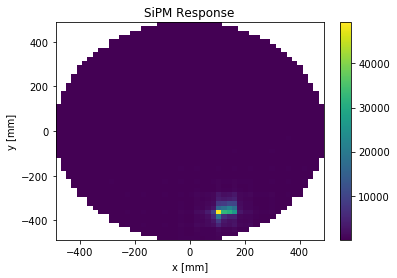

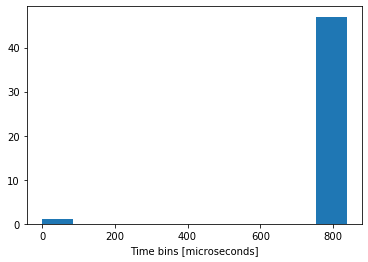

2


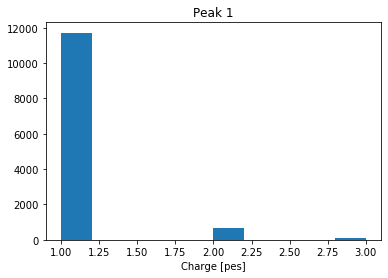

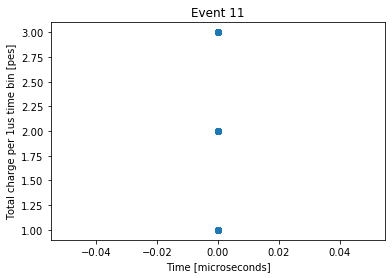

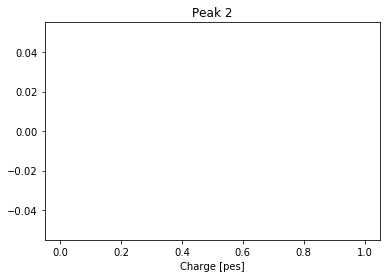

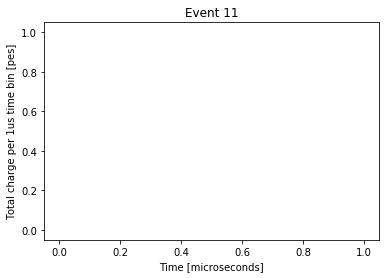

-------------------- Event 12 -----------------------


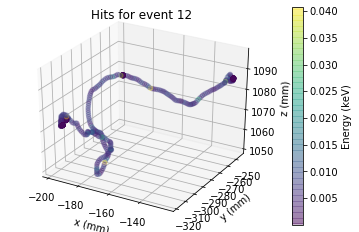

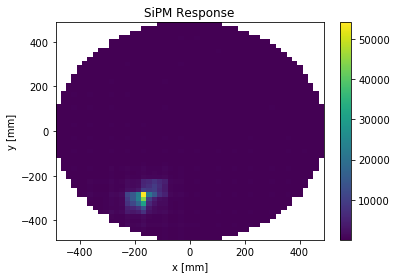

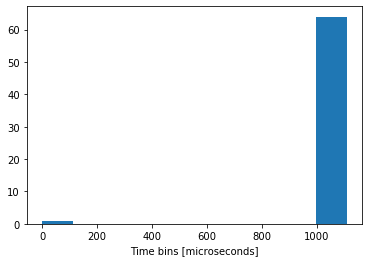

2


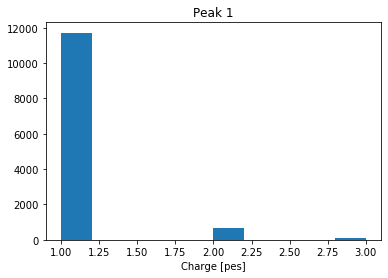

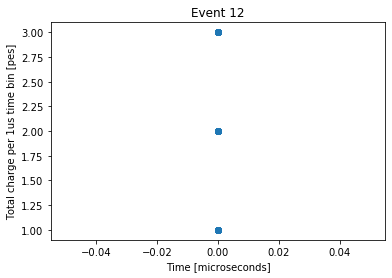

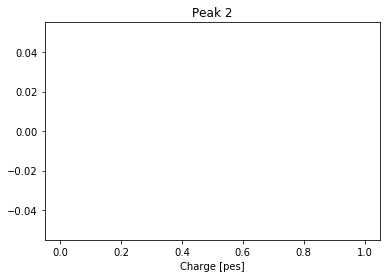

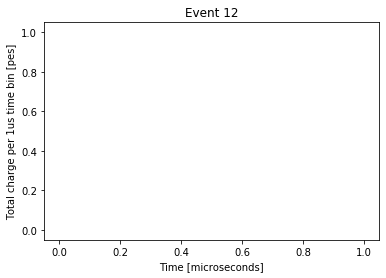

-------------------- Event 13 -----------------------


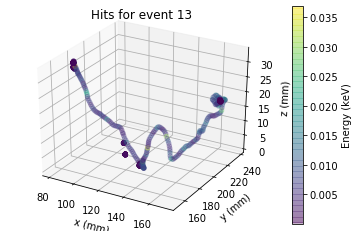

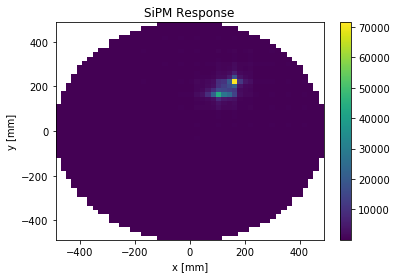

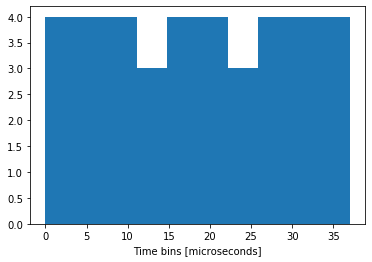

1


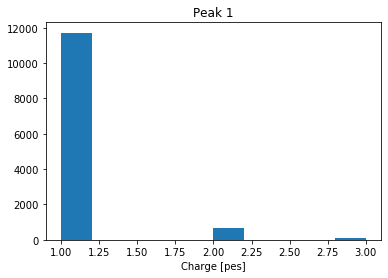

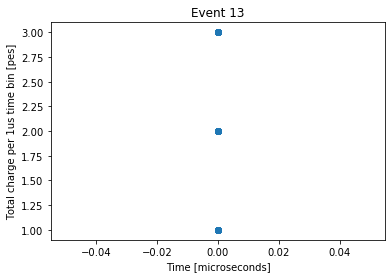

-------------------- Event 14 -----------------------


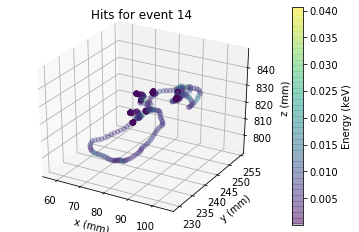

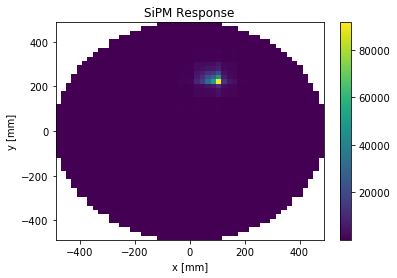

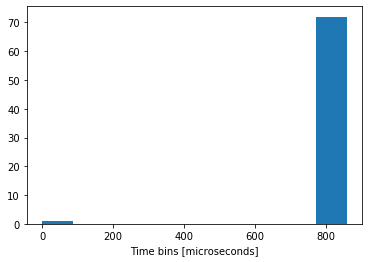

2


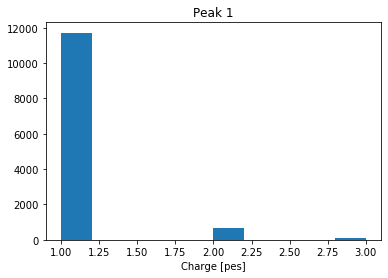

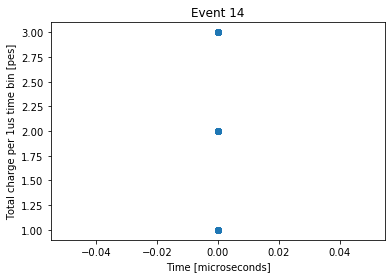

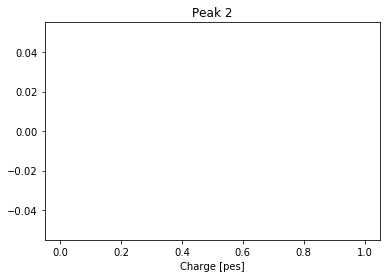

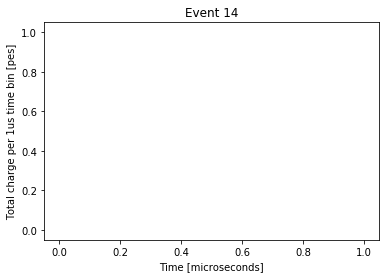

-------------------- Event 15 -----------------------


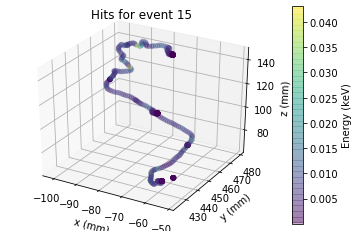

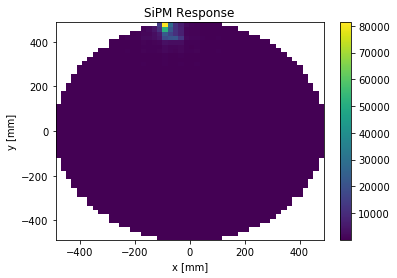

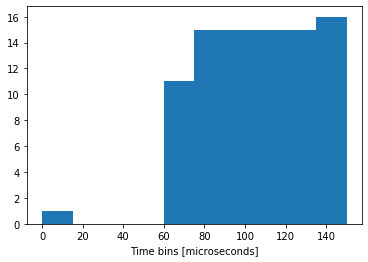

2


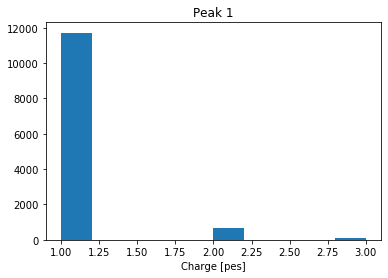

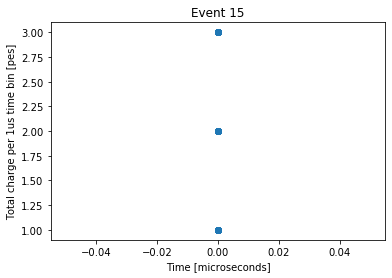

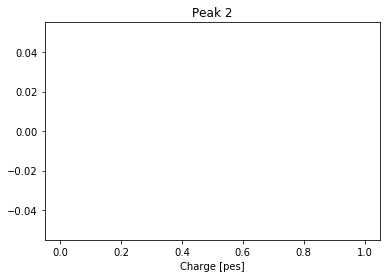

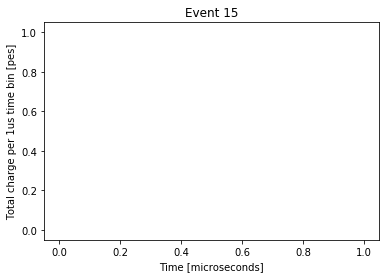

-------------------- Event 16 -----------------------


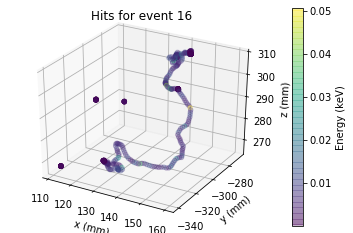

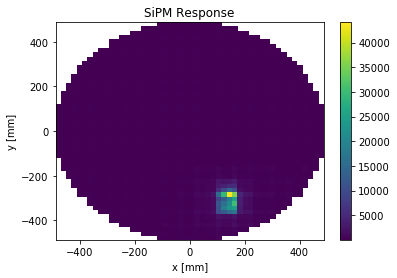

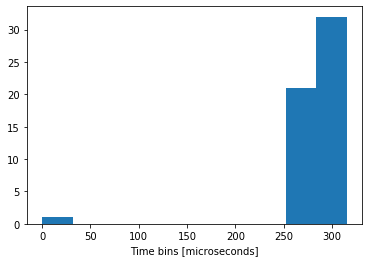

2


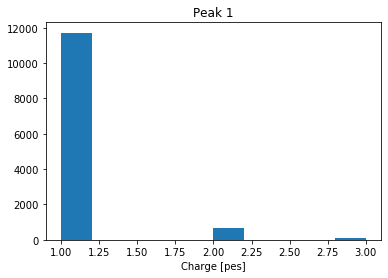

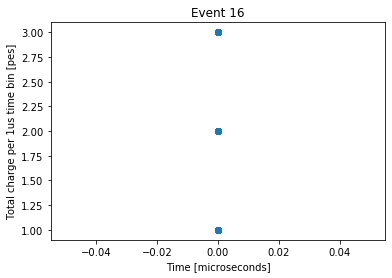

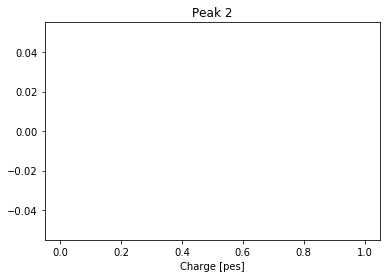

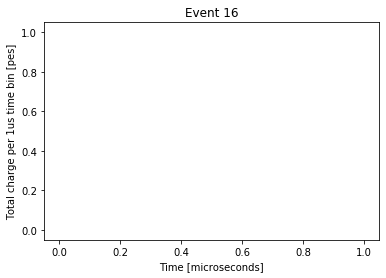

-------------------- Event 17 -----------------------


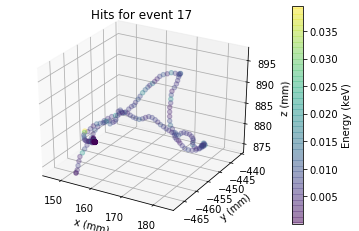

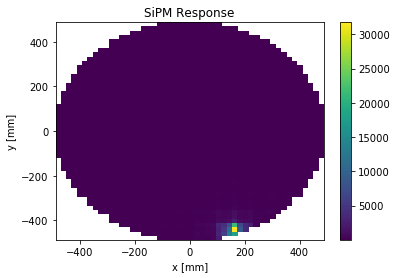

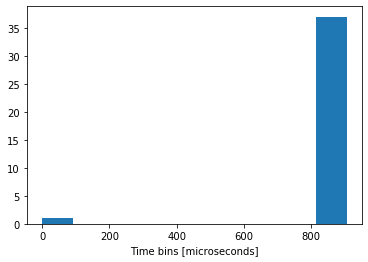

2


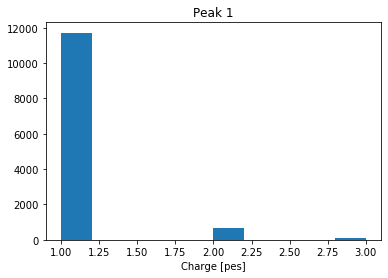

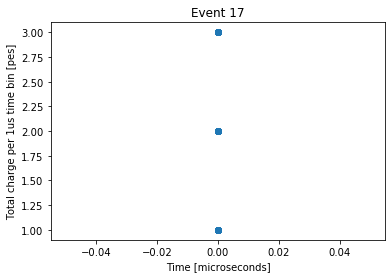

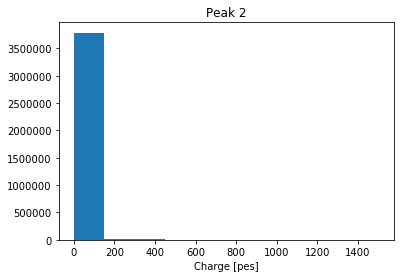

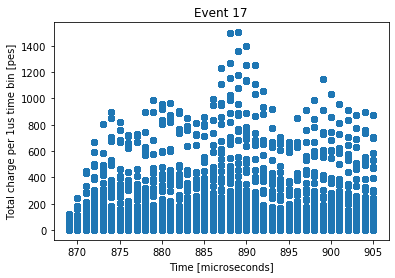

    Total charge in peak 2 = 34848996
    Max charge per time bin = 1502
    Width of event = 36 us
-------------------- Event 18 -----------------------


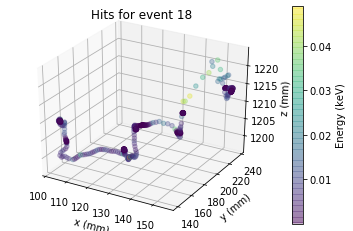

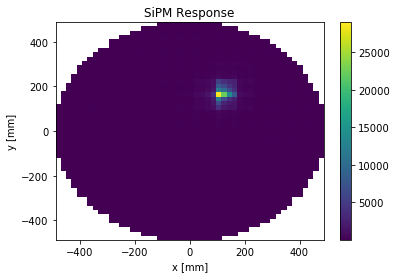

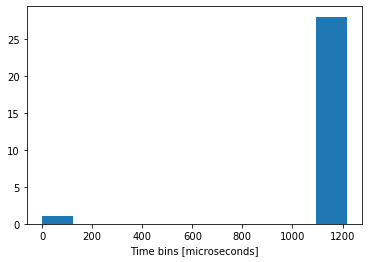

2


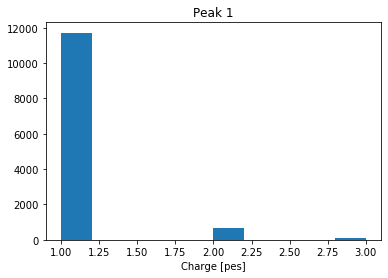

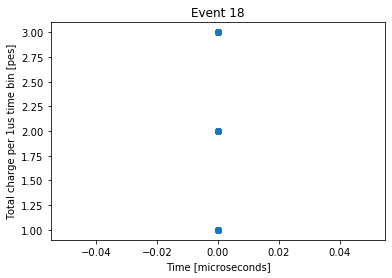

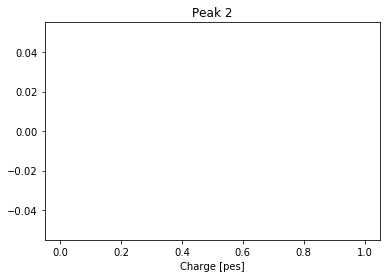

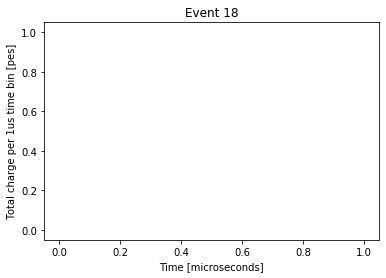

-------------------- Event 19 -----------------------


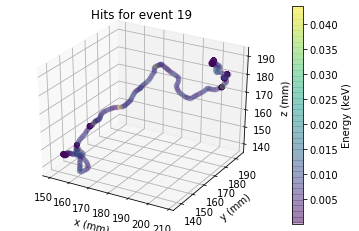

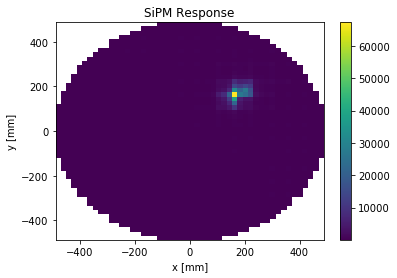

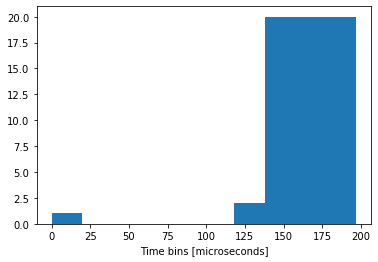

2


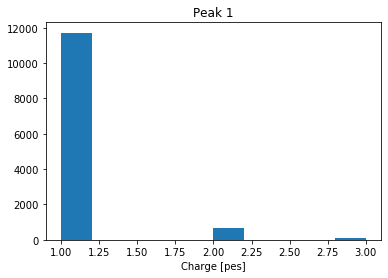

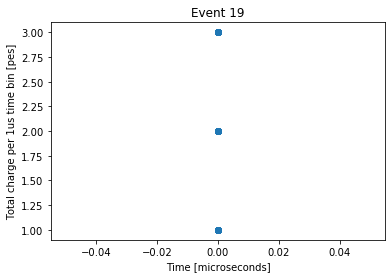

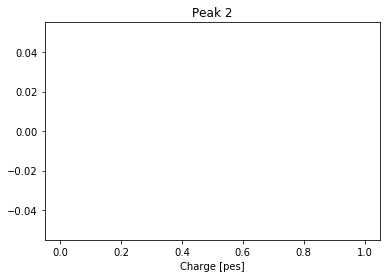

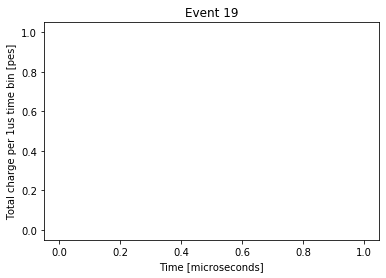

In [34]:
widths = []
for _, event in sipm_response.groupby('event_id'):
    event_id = event.event_id.values[0]
    print('-------------------- Event '+str(event_id)+' -----------------------')
    
    # Plot entire track
    event_hits = hits.loc[hits.event_id==event_id]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(event_hits.x, event_hits.y, event_hits.z, c=event_hits.energy, alpha=0.3, cmap='viridis')
    cb = fig.colorbar(p, ax=ax)
    cb.set_label('Energy (keV)')
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('y (mm)')
    ax.set_zlabel('z (mm)')
    #ax.set_ylim(-200,200)
    #ax.set_xlim(-200,200)
    #ax.set_zlim(0,1500)
    ax.set_title('Hits for event '+str(event_id))
    plt.show()
    
    summed_event = event.groupby('sensor_id').agg({'charge':'sum'}).reset_index()
    these_sipm_positions = sipm_positions.loc[sipm_positions.sensor_id.isin(summed_event.sensor_id.values)]
    sensor_positions_rep = these_sipm_positions.reindex(these_sipm_positions.index.repeat(summed_event.groupby('sensor_id').sensor_id.count().values))
    summed_event = summed_event.merge(sensor_positions_rep)
    plt.hist2d(summed_event.x, summed_event.y, weights=summed_event.charge, bins=[50,50], cmin=1)
    plt.colorbar()
    plt.title('SiPM Response')
    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')
    plt.show()
    
    # Get time bins
    time_bins = event.time_bin.drop_duplicates().sort_values()
    plt.hist(time_bins)
    plt.xlabel('Time bins [microseconds]')
    plt.show()
    
    # Splits times into groups (peaks) to get blobs
    peaks = split_in_peaks(time_bins, 1)
    i = 1
    print(len(peaks))
    for peak_timebins in peaks:
        thispeak_charges = sipms_event100.loc[sipms_event100.time_bin.isin(peak_timebins)]
        plt.hist(thispeak_charges.charge)
        plt.title('Peak '+str(i))
        plt.xlabel('Charge [pes]')
        plt.show()

        plt.plot(thispeak_charges.time_bin.values, thispeak_charges.charge.values, 'o')
        #plt.yscale('log')
        plt.xlabel('Time [microseconds]')
        plt.ylabel('Total charge per 1us time bin [pes]')
        plt.title('Event '+str(event_id))
        plt.show()
        
        if not thispeak_charges.empty and thispeak_charges.time_bin.values.min()>0:
            width = thispeak_charges.time_bin.values.max() - thispeak_charges.time_bin.values.min()
            widths.append(width)
        
            print('    Total charge in peak '+str(i)+' = '+str(thispeak_charges.charge.sum()))
            print('    Max charge per time bin = '+str(thispeak_charges.charge.max()))
            print('    Width of event = '+str(width)+' us')
    
        i += 1

In [35]:
widths

[23, 54, 36]

### Single event info

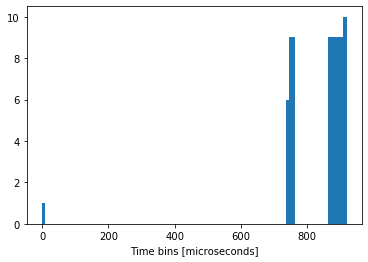

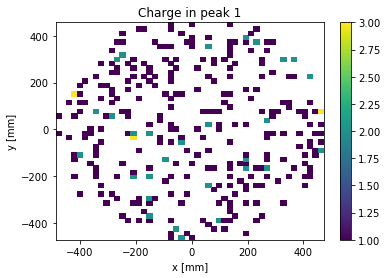

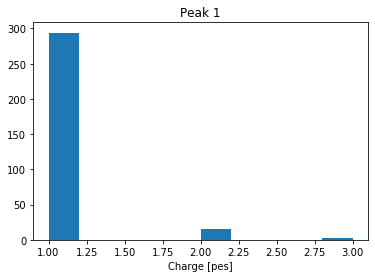

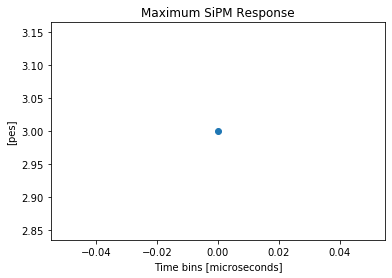

Peak 1
    Total charge = 332
    Max charge per time bin = 3
    Width = 0


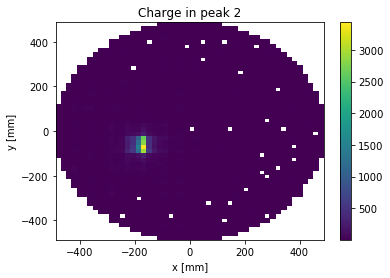

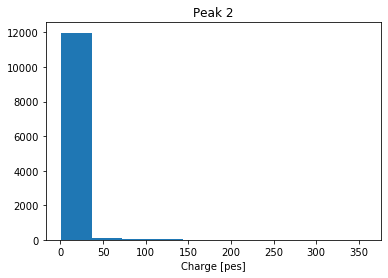

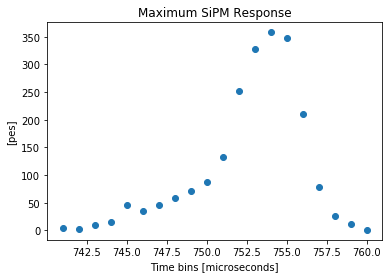

Peak 2
    Total charge = 38860
    Max charge per time bin = 358
    Width = 23


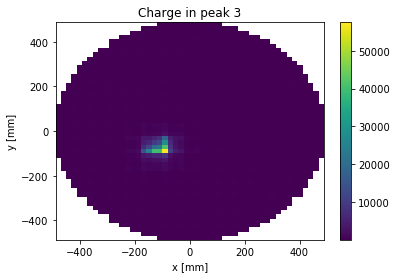

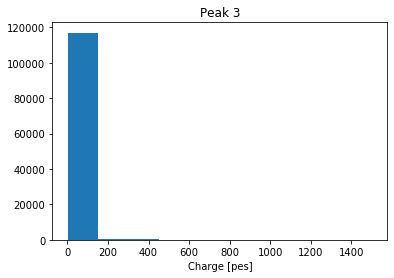

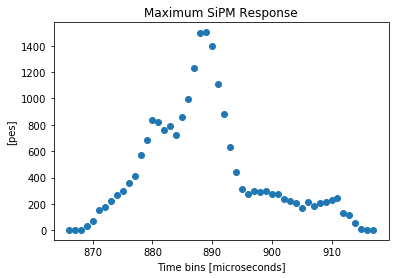

Peak 3
    Total charge = 750446
    Max charge per time bin = 1502
    Width = 54


In [36]:
# Get time bins
event_id = 10
event = sipm_response[sipm_response.event_id==event_id]
time_bins = event.time_bin.drop_duplicates().sort_values()
plt.hist(time_bins, bins=100)
plt.xlabel('Time bins [microseconds]')
plt.show()

# Splits times into groups (peaks) to get blobs
peaks = split_in_peaks(time_bins, 1)

i = 1
for peak_timebins in peaks:
    thispeak_charges = sipms_event100.loc[sipms_event100.time_bin.isin(peak_timebins)].drop_duplicates()
    
    summed_event = thispeak_charges.groupby('sensor_id').agg({'charge':'sum'}).reset_index()
    these_sipm_positions = sipm_positions.loc[sipm_positions.sensor_id.isin(summed_event.sensor_id.values)]
    sensor_positions_rep = these_sipm_positions.reindex(these_sipm_positions.index.repeat(summed_event.groupby('sensor_id').sensor_id.count().values))
    summed_event = summed_event.merge(sensor_positions_rep)
    plt.hist2d(summed_event.x, summed_event.y, weights=summed_event.charge, bins=[50,50], cmin=1)
    plt.colorbar()
    plt.title('Charge in peak '+str(i))
    plt.xlabel('x [mm]')
    plt.ylabel('y [mm]')
    plt.show()
    
    plt.hist(thispeak_charges.charge)
    plt.title('Peak '+str(i))
    plt.xlabel('Charge [pes]')
    plt.show()

    max_sipm = thispeak_charges.loc[thispeak_charges.charge == thispeak_charges.charge.max()].sensor_id.values[0]
    max_sipm_response = thispeak_charges.loc[thispeak_charges.sensor_id == max_sipm]
    plt.plot(max_sipm_response.time_bin, max_sipm_response.charge, 'o')
    plt.title('Maximum SiPM Response')
    plt.xlabel('Time bins [microseconds]')
    plt.ylabel('[pes]')
    plt.show()
    
    width = thispeak_charges.time_bin.values.max() - thispeak_charges.time_bin.values.min()
    
    print('Peak '+str(i))
    print('    Total charge = '+str(thispeak_charges.charge.sum()))
    print('    Max charge per time bin = '+str(thispeak_charges.charge.max()))
    print('    Width = '+str(width))

    i += 1

### Max and min over all events

In [37]:
sipms_mean = sipm_response.groupby('event_id').apply(lambda grp: np.mean(grp.charge))
sipms_max = sipm_response.groupby('event_id').apply(lambda grp: np.max(grp.charge))
np.mean(sipms_max.values)

2488.7

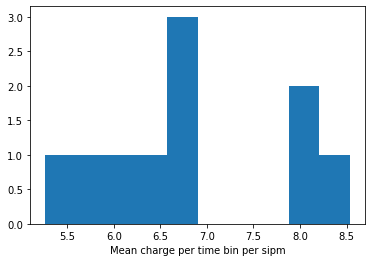

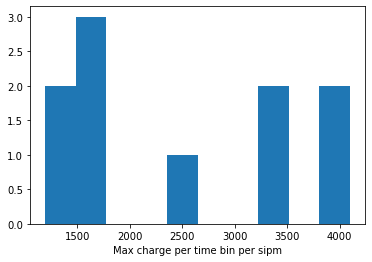

In [38]:
plt.hist(sipms_mean)
plt.xlabel('Mean charge per time bin per sipm')
plt.show()

plt.hist(sipms_max)
plt.xlabel('Max charge per time bin per sipm')
plt.show()

### Energy density and radius of blobs

In [39]:
event_id = 10
electrons = particles.loc[particles.particle_name=='e-']
event_electrons = electrons.loc[electrons.event_id==event_id]
primary_electrons_event = event_electrons.loc[event_electrons.mother_id==0]
centers = np.array([primary_electrons_event.final_x.values, primary_electrons_event.final_y.values, primary_electrons_event.final_z.values]).T

In [40]:
def InsideBlob(hit, center, blob_r = 20.):
    r = np.sqrt((center[0]-hit.x)**2. + (center[1] - hit.y)**2. + (center[2] - hit.z)**2.)#.values[0]
    return hit[r < blob_r]

In [54]:
maxes = [max(blob_energies1), max(blob_energies2)]
max_blob = np.where(maxs==max(maxes))
if max_blob==0:
    name1 = 'blob 1'
else:
    name1 = 'blob 2'
name1

'blob 2'

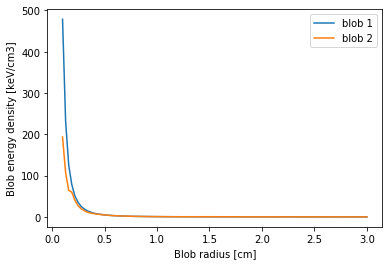

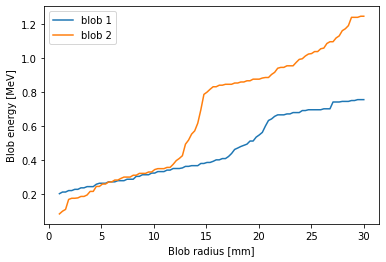

In [41]:
hits10 = hits[hits.event_id==10]
rs = np.linspace(1.0 ,30, 100)
blob_energies1 = []
blob_energies2 = []
for r in rs:
    blob1 = InsideBlob(hits10, centers[0], r)
    blob2 = InsideBlob(hits10, centers[1], r)
    blob_energies1.append(blob1.energy.sum())
    blob_energies2.append(blob2.energy.sum())
plt.plot(rs/10., np.array(blob_energies1)*10000/((4*np.pi*rs**3.)/3.), label='blob 1')
plt.plot(rs/10., np.array(blob_energies2)*10000/((4*np.pi*rs**3.)/3.), label='blob 2')
plt.legend()
plt.xlabel('Blob radius [cm]')
plt.ylabel('Blob energy density [keV/cm3]')
#plt.yscale('log')
plt.show()

plt.plot(rs, blob_energies1, label='blob 1')
plt.plot(rs, blob_energies2, label='blob 2')
plt.legend()
plt.xlabel('Blob radius [mm]')
plt.ylabel('Blob energy [MeV]')
#plt.yscale('log')
plt.show()

In [42]:
sum(blob_energies1[0:20])

4.834922179579735

In [43]:
sum(blob_energies2[0:20])

4.064775310456753

In [44]:
min_diff = 40.
if sum(np.array([abs(centers[0,i] - centers[1,i]) for i in range(len(centers[0]))]) - min_diff) > 0:
    print('good blobs!')

### Making it work over many events and files

In [45]:
def GetPeakInfo(event_response):
    event_id = event_response.event_id.values[0]
    time_bins = event_response.time_bin.drop_duplicates().sort_values()
    plt.hist(time_bins, bins=100)
    plt.xlabel('Time bins [microseconds]')
    plt.title('Event '+str(event_id))
    plt.show()
    plt.savefig(outdir+"event"+str(event_id)+"timebins.png")
    #plt.close()

    # Splits times into groups (peaks) to get blobs
    peaks = split_in_peaks(time_bins, 1)

    i = 1
    print('Event '+str(event_id))
    for peak_timebins in peaks:
        thispeak_charges = sipms_event100.loc[sipms_event100.time_bin.isin(peak_timebins)].drop_duplicates()

        summed_event = thispeak_charges.groupby('sensor_id').agg({'charge':'sum'}).reset_index()
        these_sipm_positions = sipm_positions.loc[sipm_positions.sensor_id.isin(summed_event.sensor_id.values)]
        sensor_positions_rep = these_sipm_positions.reindex(these_sipm_positions.index.repeat(summed_event.groupby('sensor_id').sensor_id.count().values))
        summed_event = summed_event.merge(sensor_positions_rep)
        plt.hist2d(summed_event.x, summed_event.y, weights=summed_event.charge, bins=[50,50], cmin=1)
        plt.colorbar()
        plt.title('Event '+str(event_id)+', Charge in peak '+str(i))
        plt.xlabel('x [mm]')
        plt.ylabel('y [mm]')
        plt.show()
        plt.savefig(outdir+"event"+str(event_id)+"_peak"+str(i)+"xyresponse.png")
        #plt.close()

        max_sipm = thispeak_charges.loc[thispeak_charges.charge == thispeak_charges.charge.max()].sensor_id.values[0]
        max_sipm_response = thispeak_charges.loc[thispeak_charges.sensor_id == max_sipm]
        plt.plot(max_sipm_response.time_bin, max_sipm_response.charge, 'o')
        plt.title('Event '+str(event_id)+', Maximum SiPM Response')
        plt.xlabel('Time bins [microseconds]')
        plt.ylabel('[pes]')
        plt.show()
        plt.savefig(outdir+"event"+str(event_id)+"_peak"+str(i)+"maxsipm.png")
        #plt.close()

        width = thispeak_charges.time_bin.values.max() - thispeak_charges.time_bin.values.min()

        print('    Peak '+str(i))
        print('        Total charge = '+str(thispeak_charges.charge.sum()))
        print('        Max charge per time bin = '+str(thispeak_charges.charge.max()))
        print('        Width = '+str(width))

        i += 1

In [46]:
def GoodBlobs(event_particles, min_diff=30.):
    event_electrons = event_particles.loc[event_particles.particle_name=='e-']
    primary_electrons_event = event_electrons.loc[event_electrons.mother_id==0]
    centers = np.array([primary_electrons_event.final_x.values, primary_electrons_event.final_y.values, primary_electrons_event.final_z.values]).T
    if sum(np.array([abs(centers[0,i] - centers[1,i]) for i in range(len(centers[0]))]) - min_diff) > 0:
        return event_particles
    return

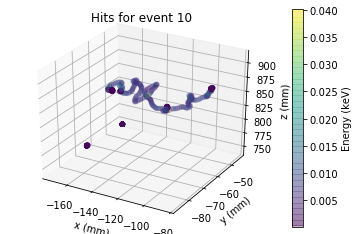

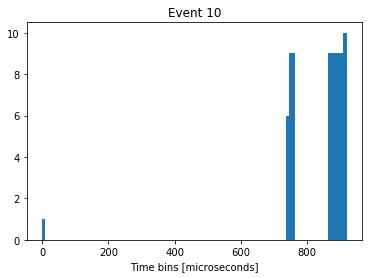

Event 10


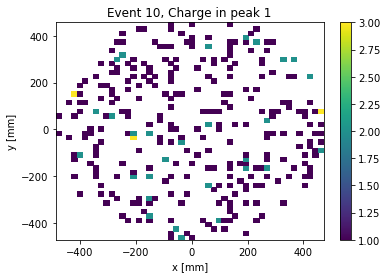

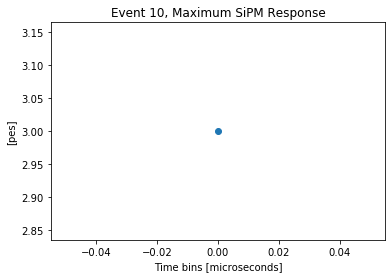

    Peak 1
        Total charge = 332
        Max charge per time bin = 3
        Width = 0


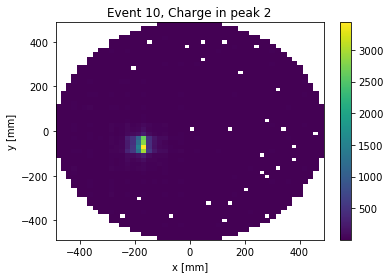

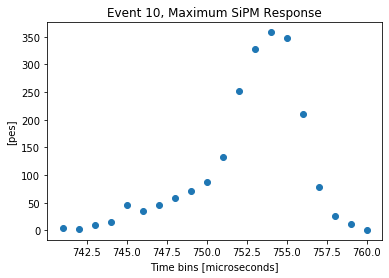

    Peak 2
        Total charge = 38860
        Max charge per time bin = 358
        Width = 23


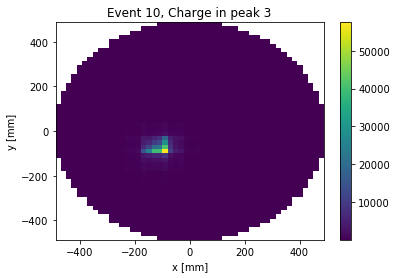

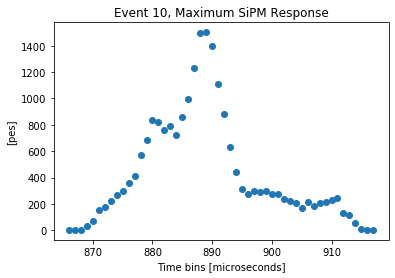

    Peak 3
        Total charge = 750446
        Max charge per time bin = 1502
        Width = 54


<Figure size 432x288 with 0 Axes>

In [47]:
files = [file_name]
for file in files:
    # filter good events
    particles = pd.read_hdf(file_name, 'MC/particles')
    good_events = particles.groupby('event_id').apply(lambda grp: GoodBlobs(grp)).event_id.drop_duplicates().values

    sns_response = pd.read_hdf(file_name, 'MC/sns_response')
    sns_positions = pd.read_hdf(file_name, 'MC/sns_positions')
    # Getting sensor info
    sns_pos_sorted = sns_positions.sort_values(by=['sensor_id'])
    sipm_positions = sns_pos_sorted[sns_pos_sorted["sensor_name"].str.contains("SiPM")]
    sns_response_sorted = sns_response.sort_values(by=['sensor_id'])
    sipm_response = sns_response_sorted.loc[sns_response_sorted["sensor_id"] >999]
    
    hits = pd.read_hdf(file_name, 'MC/hits')
    
    for event_id in good_events[0:1]:
        
        # Plot entire track
        event_hits = hits[hits.event_id==event_id]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        p = ax.scatter(event_hits.x, event_hits.y, event_hits.z, c=event_hits.energy, alpha=0.3, cmap='viridis')
        cb = fig.colorbar(p, ax=ax)
        cb.set_label('Energy (keV)')
        ax.set_xlabel('x (mm)')
        ax.set_ylabel('y (mm)')
        ax.set_zlabel('z (mm)')
        ax.set_title('Hits for event '+str(event_id))
        plt.show()
        plt.savefig(outdir+"event"+str(event_id)+"_track.png")
        #plt.close()
        
        event_response = sipm_response[sipm_response.event_id==event_id]
        GetPeakInfo(event_response)

In [48]:
summed_event = event.groupby('sensor_id').agg({'charge':'sum'}).reset_index()
these_sipm_positions = sipm_positions.loc[sipm_positions.sensor_id.isin(summed_event.sensor_id.values)]
sensor_positions_rep = these_sipm_positions.reindex(these_sipm_positions.index.repeat(summed_event.groupby('sensor_id').sensor_id.count().values))
summed_event = summed_event.merge(sensor_positions_rep)

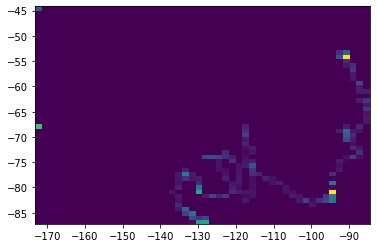

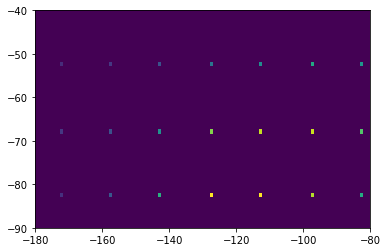

In [49]:
plt.hist2d(hits10.x, hits10.y, weights=hits10.energy, bins=[50,50])
plt.show()

plt.hist2d(summed_event.x, summed_event.y, weights=summed_event.charge, bins=[1000,1000])
plt.xlim(-180,-80)
plt.ylim(-90, -40)
plt.show()